# Zomato Rating Prediction

***
_**Importing the required libraries & packages**_


In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import plotly.graph_objs as go
import plotly.offline as py
import matplotlib.ticker as mtick
plt.style.use('fivethirtyeight')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

_**Changing The Default Working Directory Path & Reading the Dataset using Pandas Command**_

In [61]:

df=pd.read_csv('/Users/mohitr/Downloads/zomato.csv')


df.head()


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


## Data Cleaning:
_**Checking the Null values of all the columns in the dataset.**_

In [62]:
df.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

_**Dropping the unwanted columns from the dataset**_

In [63]:
df.drop(['url','phone'],inplace=True,axis=1)

_**Checking for the duplicate values**_

In [64]:
df.duplicated().sum()

43

_**Dropping all the duplicate values from the dataset**_

In [65]:
df.drop_duplicates(inplace=True)

_**Checking for the duplicate values after dropping it**_

In [66]:
df.duplicated().sum()

0

_**Dropping all the null values from the dataset**_

In [67]:
df.dropna(how='any',inplace=True)

_**Checking the Null values of all the columns in the dataset after dropping all the null values.**_

In [68]:
df.isna().sum()

address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64

_**Getting all the column names from the dataset**_

In [69]:
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

_**Renaming the columns of the dataset for making it simple**_

In [70]:
df=df.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type','listed_in(city)':'city'})

_**Checking the column names from the dataset after renaming it**_

In [71]:
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines', 'cost',
       'reviews_list', 'menu_item', 'type', 'city'],
      dtype='object')

_**Getting all the unique values of cost column from the dataset.**_

In [72]:
df.cost.unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '750', '200', '850', '1,200', '150', '350', '250', '1,500',
       '1,300', '1,000', '100', '900', '1,100', '1,600', '950', '230',
       '1,700', '1,400', '1,350', '2,200', '2,000', '1,800', '1,900',
       '180', '330', '2,500', '2,100', '3,000', '2,800', '3,400', '40',
       '1,250', '3,500', '4,000', '2,400', '1,450', '3,200', '6,000',
       '1,050', '4,100', '2,300', '120', '2,600', '5,000', '3,700',
       '1,650', '2,700', '4,500'], dtype=object)

_**Updating the cost column with the appropriate form of numerics**_

In [73]:
df['cost']=df['cost'].apply(lambda x:x.replace(',',''))

_**Getting all the unique values of cost column from the dataset after changing it to numeric form**_

In [74]:
df.cost.unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '750', '200', '850', '1200', '150', '350', '250', '1500', '1300',
       '1000', '100', '900', '1100', '1600', '950', '230', '1700', '1400',
       '1350', '2200', '2000', '1800', '1900', '180', '330', '2500',
       '2100', '3000', '2800', '3400', '40', '1250', '3500', '4000',
       '2400', '1450', '3200', '6000', '1050', '4100', '2300', '120',
       '2600', '5000', '3700', '1650', '2700', '4500'], dtype=object)

_**Changing the data type of the cost column from "object" to "float"**_

In [75]:
df['cost']=df['cost'].astype('float')

_**Getting the unique value and its counts in the cost Column from the dataset**_

In [76]:
df.cost.value_counts()

cost
400.0     2485
500.0     2323
600.0     2175
300.0     1694
800.0     1664
1000.0    1242
700.0     1207
1200.0     908
200.0      873
1500.0     866
450.0      721
250.0      701
750.0      651
650.0      645
350.0      553
900.0      528
1300.0     496
1100.0     466
1400.0     453
550.0      440
150.0      371
2000.0     298
1600.0     241
1700.0     233
1800.0     193
3000.0     159
2500.0     143
850.0      122
100.0      120
2100.0      63
1900.0      58
950.0       47
2200.0      39
2800.0      31
3500.0      25
4000.0      24
2400.0      22
1350.0      18
180.0       17
3400.0      13
230.0       10
1250.0       9
40.0         8
1650.0       6
1450.0       5
2600.0       4
1050.0       4
4100.0       4
330.0        4
2700.0       2
3200.0       2
120.0        2
6000.0       2
4500.0       2
5000.0       1
3700.0       1
2300.0       1
Name: count, dtype: int64

_**Getting all the unique values of rate column from the dataset.**_

In [77]:
df.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5', '2.7/5', '4.7/5', 'NEW', '2.4/5', '2.2/5', '2.3/5',
       '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5', '2.9 /5',
       '2.7 /5', '2.5 /5', '2.6 /5', '4.5 /5', '4.3 /5', '3.7 /5',
       '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '3.4 /5', '3.6 /5',
       '3.3 /5', '4.6 /5', '4.9 /5', '3.2 /5', '3.0 /5', '2.8 /5',
       '3.5 /5', '3.1 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

_**Updating the rate column without having "NEW" in it for the future processing**_

In [78]:
df=df[df['rate']!='NEW']

_**Getting all the unique values of rate column from the dataset after updating the rate column.**_

In [79]:
df.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5', '4.8/5',
       '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5', '2.9 /5', '2.7 /5',
       '2.5 /5', '2.6 /5', '4.5 /5', '4.3 /5', '3.7 /5', '4.4 /5',
       '4.9/5', '2.1/5', '2.0/5', '1.8/5', '3.4 /5', '3.6 /5', '3.3 /5',
       '4.6 /5', '4.9 /5', '3.2 /5', '3.0 /5', '2.8 /5', '3.5 /5',
       '3.1 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5', '2.1 /5',
       '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

_**Updating the rate column as it can be transformed into proper form of numerics.**_

In [80]:
df['rate']=df['rate'].apply(lambda x:x.replace('/5',''))

_**Getting all the unique values of rate column from the dataset after updating it.**_

In [81]:
df.rate.unique()

array(['4.1', '3.8', '3.7', '4.6', '4.0', '4.2', '3.9', '3.0', '3.6',
       '2.8', '4.4', '3.1', '4.3', '2.6', '3.3', '3.5', '3.8 ', '3.2',
       '4.5', '2.5', '2.9', '3.4', '2.7', '4.7', '2.4', '2.2', '2.3',
       '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ', '2.9 ', '2.7 ', '2.5 ',
       '2.6 ', '4.5 ', '4.3 ', '3.7 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '3.4 ', '3.6 ', '3.3 ', '4.6 ', '4.9 ', '3.2 ', '3.0 ', '2.8 ',
       '3.5 ', '3.1 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ', '2.2 ',
       '2.0 ', '1.8 '], dtype=object)

## Visualizations

_**Assigning the Top 20 restaurants to the new variable for the simpler visualization**_

In [82]:
chains=df['name'].value_counts().head(20)

_**Plotting the bar graph for the most famous restaurants(Top 20 restaurants) and saving the PNG file**_

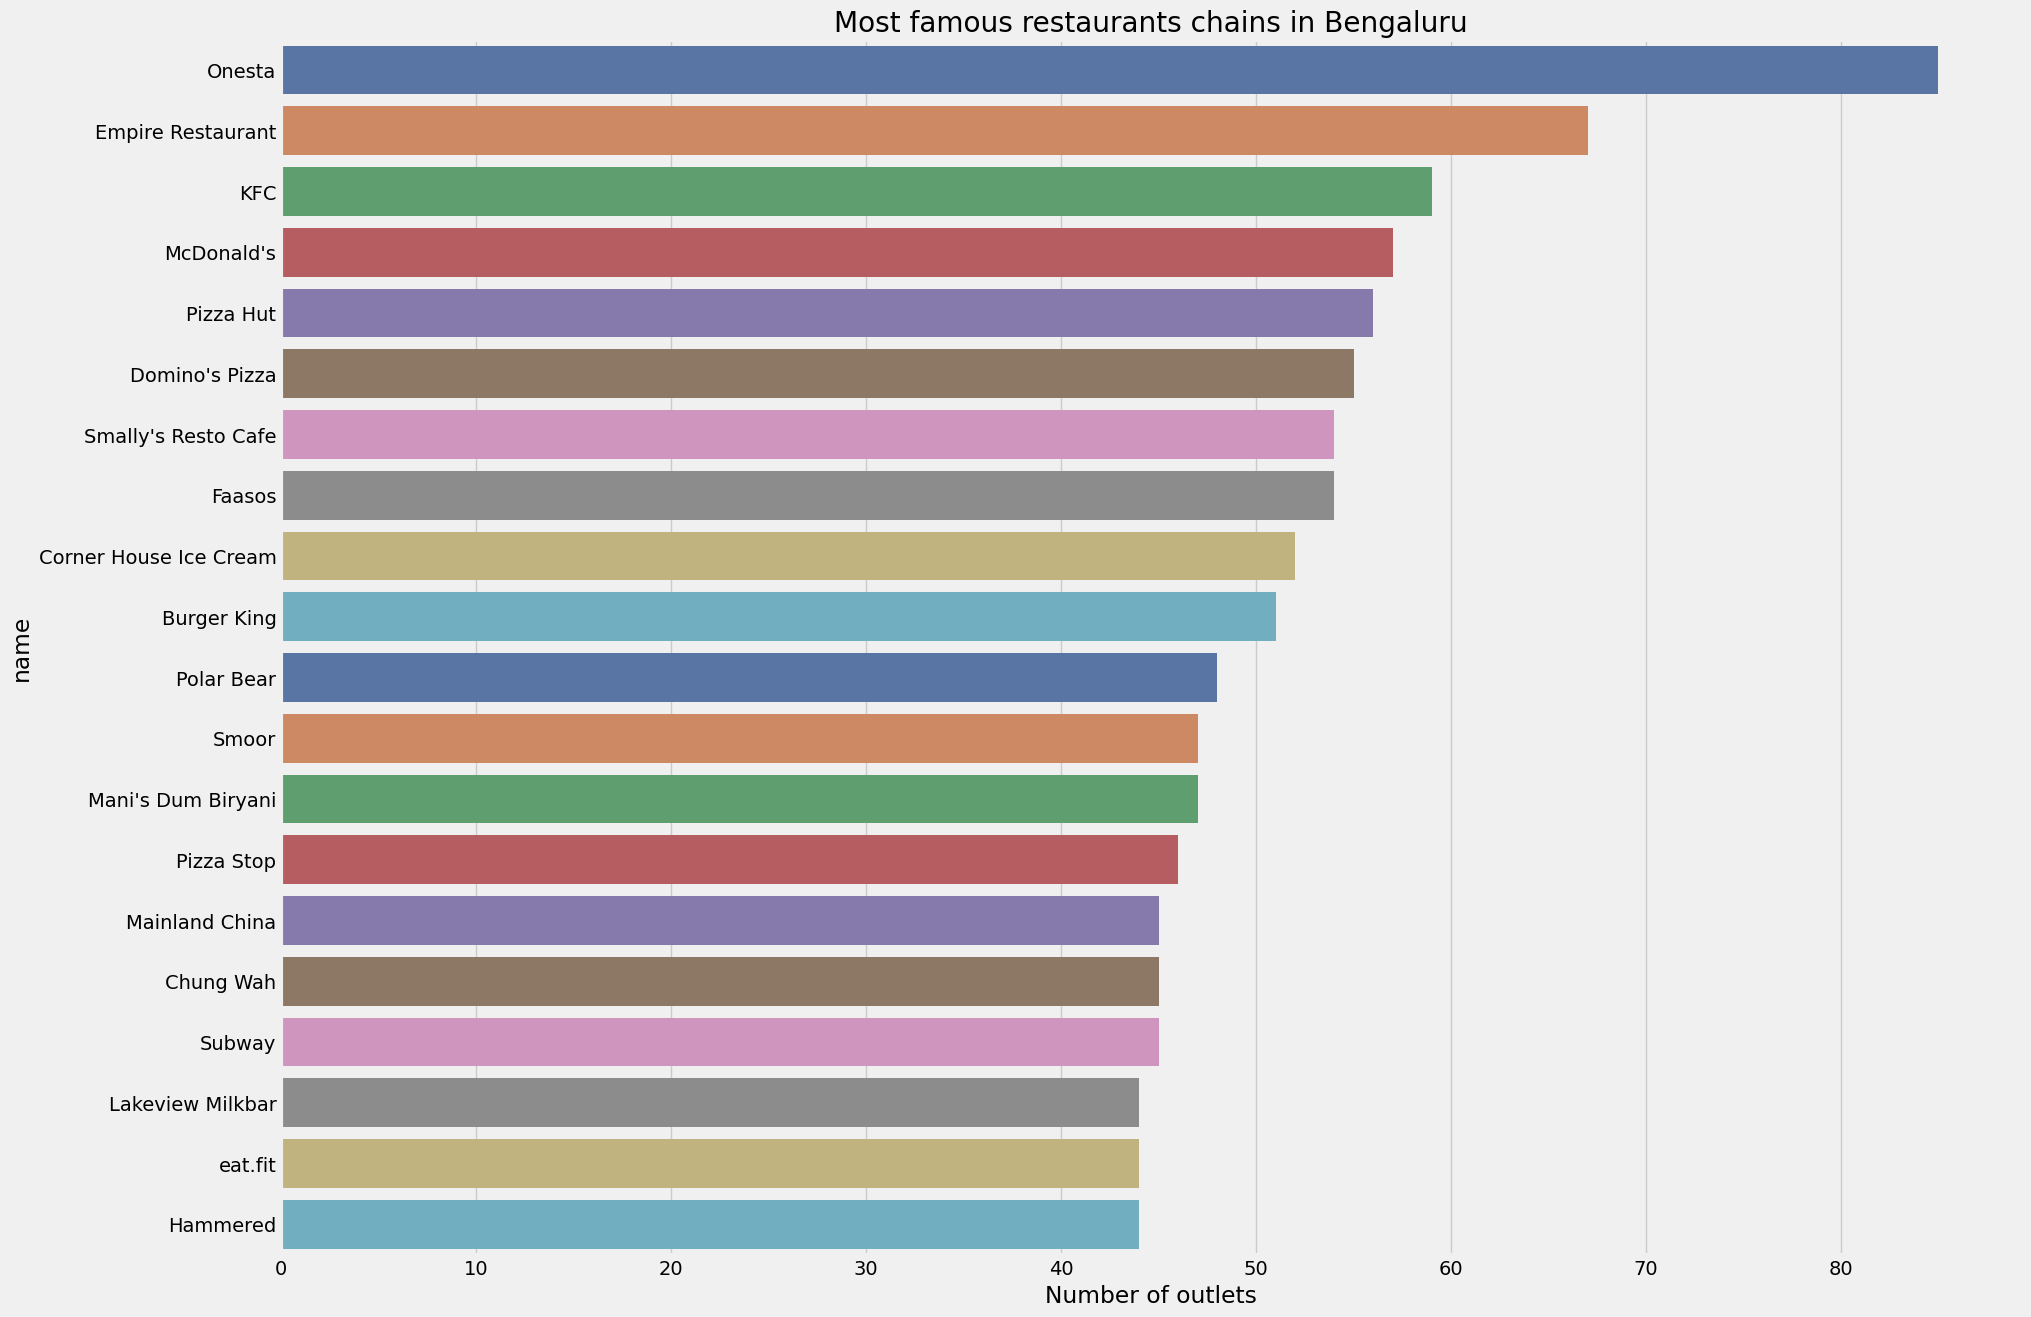

In [83]:
plt.figure(figsize=(20,15))
sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title("Most famous restaurants chains in Bengaluru")
plt.xlabel("Number of outlets")
plt.savefig('Most famous restaurants in Bengaluru.png')
plt.show()

_**Plotting the Pie-Chart with Table Booking Values**_

In [84]:
x=df['book_table'].value_counts()
colors = ['#800080', '#0000A0']
trace=go.Pie(labels=x.index,values=x,textinfo="value",
            marker=dict(colors=colors, 
                           line=dict(color='#001000', width=3)))
layout=go.Layout(title="Table booking",width=400,height=400)
fig=go.Figure(data=[trace],layout=layout)
py.iplot(fig, filename='pie_chart_subplots')
plt.show()


_**Plotting The  Bar Plot with the Online Delivery data using Seaborn Count Plot Package and saving the PNG File**_

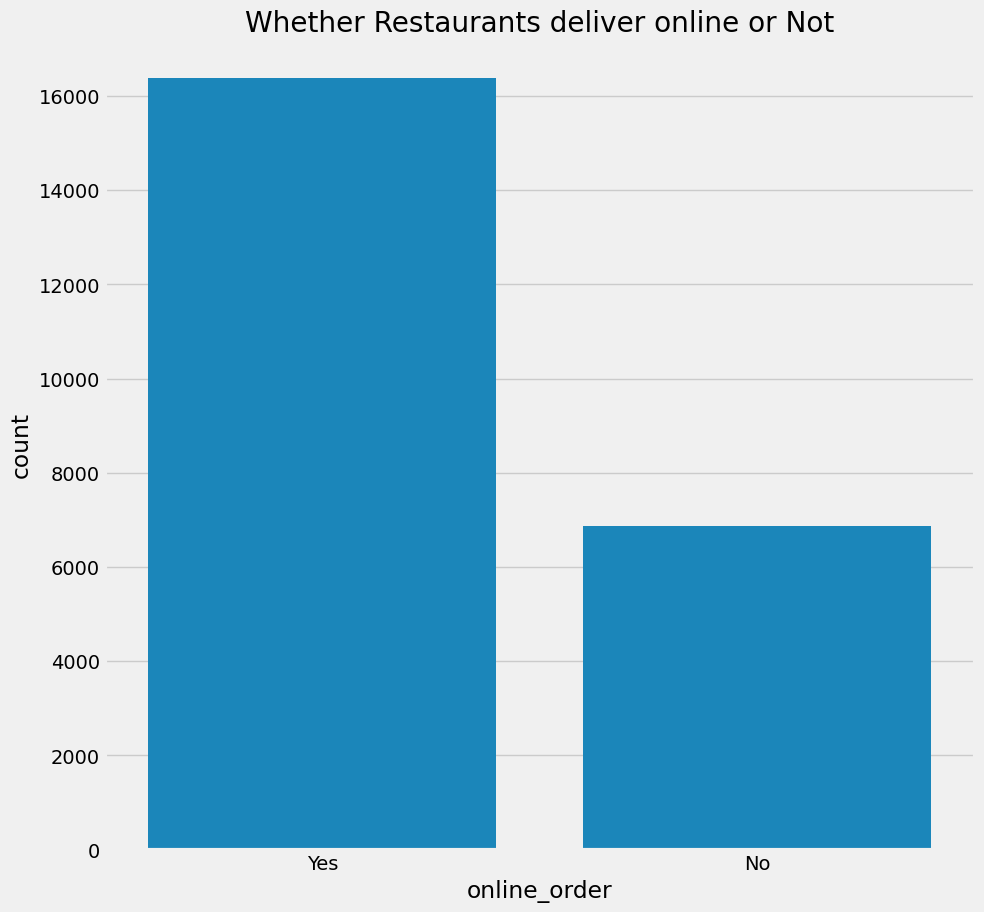

In [85]:
sns.countplot(x = 'online_order', data = df)
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Whether Restaurants deliver online or Not')
plt.savefig('Online Delivery of Restaurants.png')
plt.show()

_**Visualizing the data distribution of the rate column against the density distribution using Seaborn Distplot and saving the PNG file**_

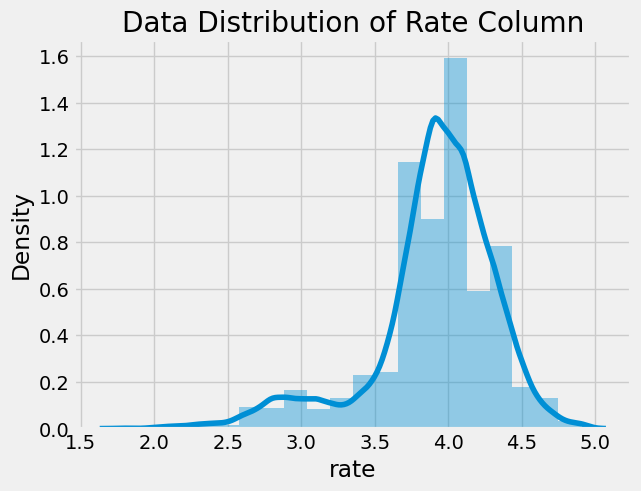

In [86]:
sns.distplot(df['rate'],bins=20)
plt.title('Data Distribution of Rate Column')
plt.savefig('Data Distribution of Rate Column.png')
plt.show()

_**Getting the Minimum and Maximum Rating of the Restaurants**_

In [87]:
display(df['rate'].min())
display(df['rate'].max())

'1.8'

'4.9 '

_**Getting all the unique values of rate column from the dataset.**_

In [88]:
df.rate.unique()

array(['4.1', '3.8', '3.7', '4.6', '4.0', '4.2', '3.9', '3.0', '3.6',
       '2.8', '4.4', '3.1', '4.3', '2.6', '3.3', '3.5', '3.8 ', '3.2',
       '4.5', '2.5', '2.9', '3.4', '2.7', '4.7', '2.4', '2.2', '2.3',
       '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ', '2.9 ', '2.7 ', '2.5 ',
       '2.6 ', '4.5 ', '4.3 ', '3.7 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '3.4 ', '3.6 ', '3.3 ', '4.6 ', '4.9 ', '3.2 ', '3.0 ', '2.8 ',
       '3.5 ', '3.1 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ', '2.2 ',
       '2.0 ', '1.8 '], dtype=object)

_**Changing the data type of the rate column from "object" to "float"**_

In [89]:
df['rate']=df['rate'].astype('float')

_**Getting all the unique values of rate column from the dataset after updating the data types.**_

In [90]:
df.rate.unique()

array([4.1, 3.8, 3.7, 4.6, 4. , 4.2, 3.9, 3. , 3.6, 2.8, 4.4, 3.1, 4.3,
       2.6, 3.3, 3.5, 3.2, 4.5, 2.5, 2.9, 3.4, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

_**Plotting the Bar Graph using Matplotlib package with rate column grouping it by an unit difference and saving the PNG file**_

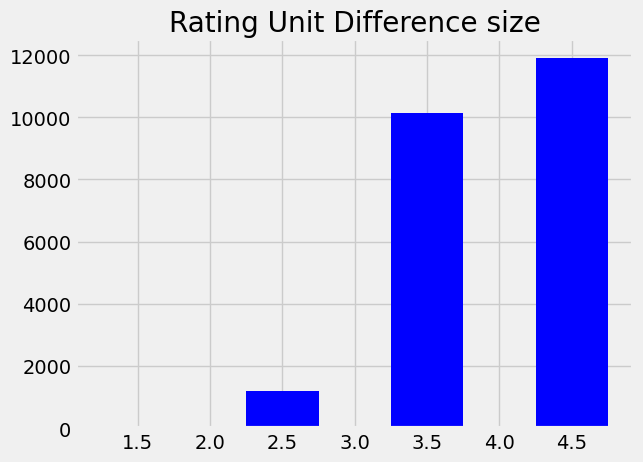

In [91]:
group= [1,2,3,4,5]
plt.hist (df['rate'],group,histtype = 'bar',rwidth =0.5,color = 'b')
plt.title('Rating Unit Difference size')
plt.savefig('Rating Unit Difference size.png')
plt.show()

_**Plotting the Bar Graph using Matplotlib package with rate column grouping it by 0.5 unit difference and saving the PNG file**_

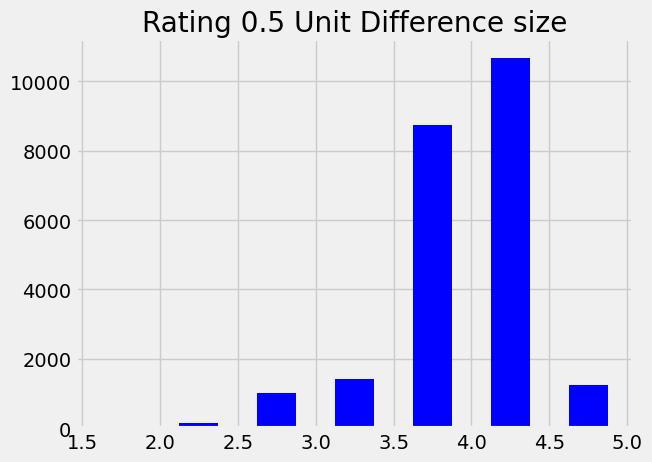

In [92]:
group= [1.5,2,2.5,3,3.5,4,4.5,5]
plt.hist (df['rate'],group,histtype = 'bar',rwidth =0.5,color = 'b')
plt.title('Rating 0.5 Unit Difference size')
plt.savefig('Rating 0.5  Unit Difference size.png')
plt.show()

_**Assigning the different variables for the rate column for using PieChart to visualize the percentage of restaurants according to ratings**_

In [93]:
gr_1to2=((df['rate']>=1) & (df['rate']<2)).sum()
gr_2to3=((df['rate']>=2)&(df['rate']<3)).sum()
gr_3to4=((df['rate']>=3) & (df['rate']<4)).sum()
gr_4to5=((df['rate']>4)).sum()

_**Plotting the Pie Chart with assigned variable to visualize the percentage of restaurants according to ratings and saving the PNG file**_ 

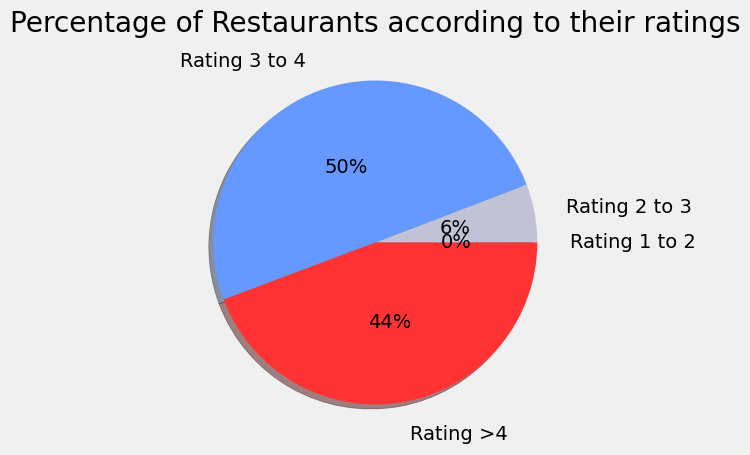

In [94]:
slices=[gr_1to2,gr_2to3,gr_3to4,gr_4to5]   
labels=['Rating 1 to 2','Rating 2 to 3','Rating 3 to 4','Rating >4']
colors = ['#ff3333','#c2c2d6','#6699ff']
plt.pie(slices,colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Percentage of Restaurants according to their ratings")

fig.set_size_inches(5,5)
plt.savefig('Percentage of Restaurants according to their ratings.png')
plt.show()

_**Plotting The Bar Plot with the Service Type data using Seaborn Count Plot Package and saving the PNG File**_

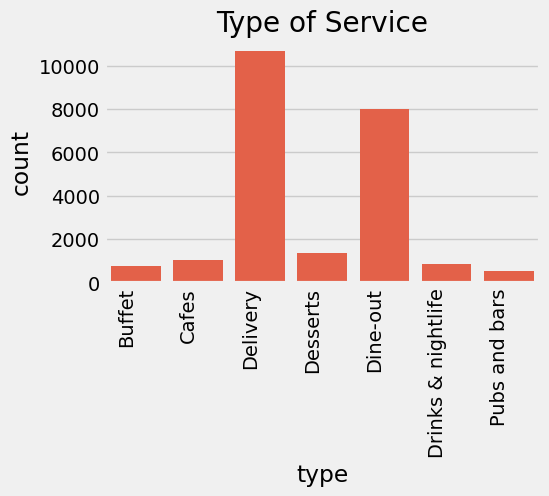

In [95]:
sns.countplot(x= 'type', data = df).set_xticklabels(sns.countplot(x= 'type' , data = df).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(5,3)
plt.title('Type of Service')
plt.savefig('Type of Service.png')
plt.show()

_**Grouping by Cost Column from the dataset by their sizes**_

In [96]:
df.groupby('cost').size()

cost
40.0         8
100.0      120
120.0        2
150.0      371
180.0       17
200.0      869
230.0       10
250.0      697
300.0     1688
330.0        4
350.0      553
400.0     2478
450.0      719
500.0     2321
550.0      440
600.0     2168
650.0      644
700.0     1202
750.0      651
800.0     1647
850.0      122
900.0      524
950.0       47
1000.0    1218
1050.0       4
1100.0     450
1200.0     903
1250.0       8
1300.0     496
1350.0      18
1400.0     447
1450.0       5
1500.0     841
1600.0     237
1650.0       6
1700.0     229
1800.0     193
1900.0      58
2000.0     298
2100.0      60
2200.0      39
2300.0       1
2400.0      22
2500.0     143
2600.0       4
2700.0       2
2800.0      31
3000.0     159
3200.0       2
3400.0      13
3500.0      25
3700.0       1
4000.0      24
4100.0       4
4500.0       2
5000.0       1
6000.0       2
dtype: int64

_**Plotting the Box Plot with cost values**_

In [97]:
from plotly.offline import iplot
trace0=go.Box(y=df['cost'],name="accepting online orders",
              marker = dict(
        color = 'rgb(113, 10, 100)',
    ))
data=[trace0]
layout=go.Layout(title="Box plot of approximate cost",width=800,height=800,yaxis=dict(title="Price"))
fig=go.Figure(data=data,layout=layout)
py.iplot(fig)

_**Visualizing the data distribution of the cost column against the density distribution using Seaborn Distplot and saving the PNG file**_

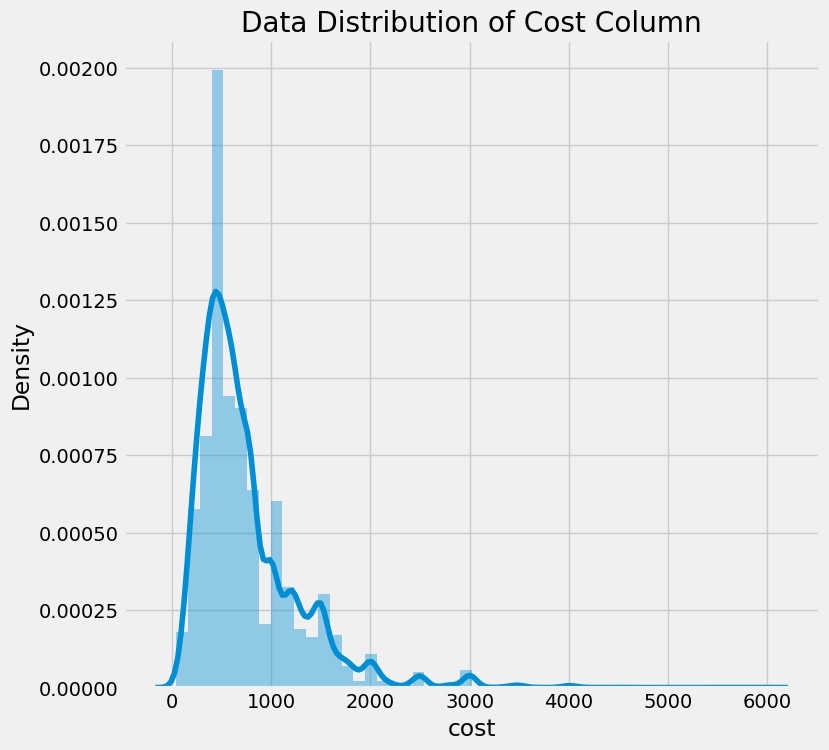

In [98]:
plt.figure(figsize=(8,8))
sns.distplot(df['cost'])
plt.title('Data Distribution of Cost Column')
plt.savefig('Data Distribution of Cost Column.png')
plt.show()


_**By using Regular Expression Package, splitting occurs in dish liked columns as multiple values seperated by comma, Extract each dishes and creating a list by apppending the each dishes**_

In [99]:
import re
likes=[]
df.index=range(df.shape[0])
for i in range(df.shape[0]):
        array_split=re.split(',',df['dish_liked'][i])
        for item in array_split:
            likes.append(item)

_**Displaying the Each Number of dishes, its counts and the list of each dishes**_

In [100]:
display ('Number of dishes', len(likes))
display(likes)

'Number of dishes'

126848

['Pasta',
 ' Lunch Buffet',
 ' Masala Papad',
 ' Paneer Lajawab',
 ' Tomato Shorba',
 ' Dum Biryani',
 ' Sweet Corn Soup',
 'Momos',
 ' Lunch Buffet',
 ' Chocolate Nirvana',
 ' Thai Green Curry',
 ' Paneer Tikka',
 ' Dum Biryani',
 ' Chicken Biryani',
 'Churros',
 ' Cannelloni',
 ' Minestrone Soup',
 ' Hot Chocolate',
 ' Pink Sauce Pasta',
 ' Salsa',
 ' Veg Supreme Pizza',
 'Masala Dosa',
 'Panipuri',
 ' Gol Gappe',
 'Onion Rings',
 ' Pasta',
 ' Kadhai Paneer',
 ' Salads',
 ' Salad',
 ' Roti',
 ' Jeera Rice',
 'Farmhouse Pizza',
 ' Chocolate Banana',
 ' Virgin Mojito',
 ' Pasta',
 ' Paneer Tikka',
 ' Lime Soda',
 ' Prawn Pizza',
 'Pizza',
 ' Mocktails',
 ' Coffee',
 ' Nachos',
 ' Salad',
 ' Pasta',
 ' Sandwiches',
 'Waffles',
 ' Pasta',
 ' Coleslaw Sandwich',
 ' Choco Waffle',
 ' Tacos',
 ' Momos',
 ' Cheese Nachos',
 'Waffles',
 ' Pasta',
 ' Crispy Chicken',
 ' Honey Chilli Chicken',
 ' Sandwich',
 ' Coffee',
 ' Crepe',
 'Mocktails',
 ' Peri Fries',
 ' Lasagne',
 ' Pizza',
 ' Chicken 

_**Displaying the indices of dataset**_

In [101]:
df.index=range(df.shape[0])
display (df.index)

RangeIndex(start=0, stop=23248, step=1)

_**Finding out the most Liked Dishes and getting its value counts and displaying the Top 30 Most liked foods**_

In [102]:
print("Count of Most liked dishes")
favourite_food = pd.Series(likes).value_counts()
display(favourite_food.head(30))

Count of Most liked dishes


 Pasta              2692
 Pizza              1915
 Cocktails          1880
 Burgers            1736
 Mocktails          1623
 Biryani            1307
 Sandwiches         1287
Burgers             1256
 Coffee             1184
 Nachos             1170
 Fish               1116
 Paratha            1107
 Salads             1055
 Chicken Biryani    1004
Cocktails            891
 Fries               876
 Noodles             854
 Beer                835
 Mutton Biryani      832
 Tea                 819
Coffee               801
 Sandwich            788
 Butter Chicken      782
 Thali               770
Biryani              749
Pizza                747
 Roti                729
 Brownie             726
 Salad               677
 Hot Chocolate       672
Name: count, dtype: int64

_**Plotting the Bar Graph with the Most Liked Foods for the Top 30 foods and Number of likes it got and saving the PNG file**_

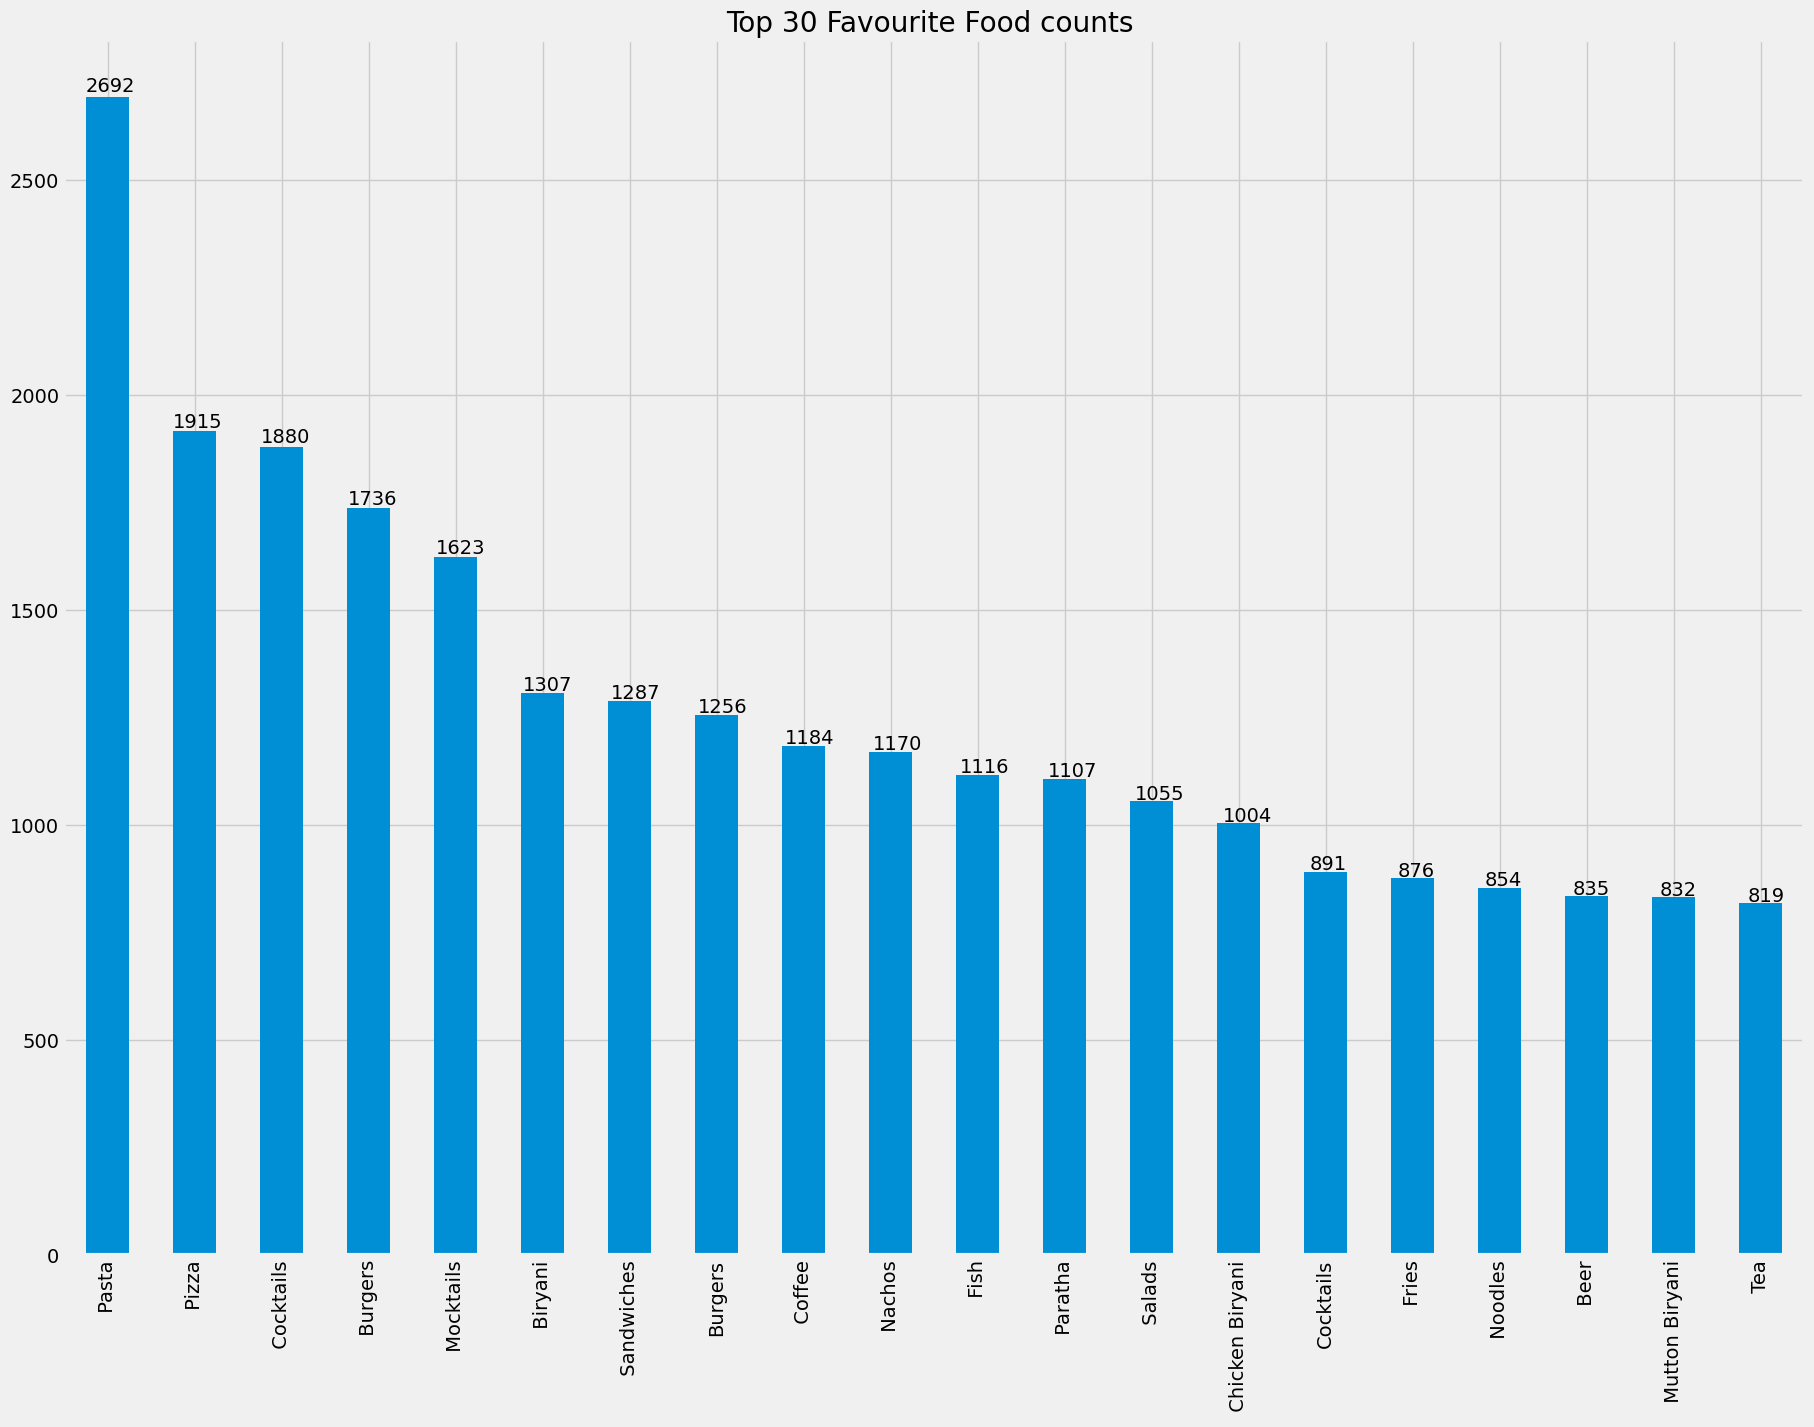

In [103]:
ax = favourite_food.nlargest(n=20, keep='first').plot(kind='bar',figsize=(20,15),title = 'Top 30 Favourite Food counts ')
for i in ax.patches:
    ax.annotate(str(i.get_height()), (i.get_x() * 1.005, i.get_height() * 1.005))
plt.savefig('Top 30 Favourite Food counts.png')
plt.show()


_**Displaying the value counts of Restaurants Type**_

In [104]:
print (df['rest_type'].value_counts().head(50))

rest_type
Casual Dining                    7326
Quick Bites                      5250
Cafe                             2375
Dessert Parlor                   1083
Casual Dining, Bar                985
Delivery                          704
Bar                               358
Takeaway, Delivery                342
Bar, Casual Dining                336
Pub                               324
Fine Dining                       311
Casual Dining, Cafe               304
Lounge                            298
Pub, Casual Dining                224
Food Court                        220
Bakery                            166
Cafe, Casual Dining               159
Dessert Parlor, Cafe              143
Beverage Shop, Quick Bites        137
Beverage Shop                     137
Cafe, Bakery                      128
Casual Dining, Pub                124
Microbrewery, Casual Dining       121
Cafe, Dessert Parlor              111
Sweet Shop                        105
Bakery, Quick Bites                96
Sw

_**Plotting the bar graph for the Restaurant types and saving the PNG file**_

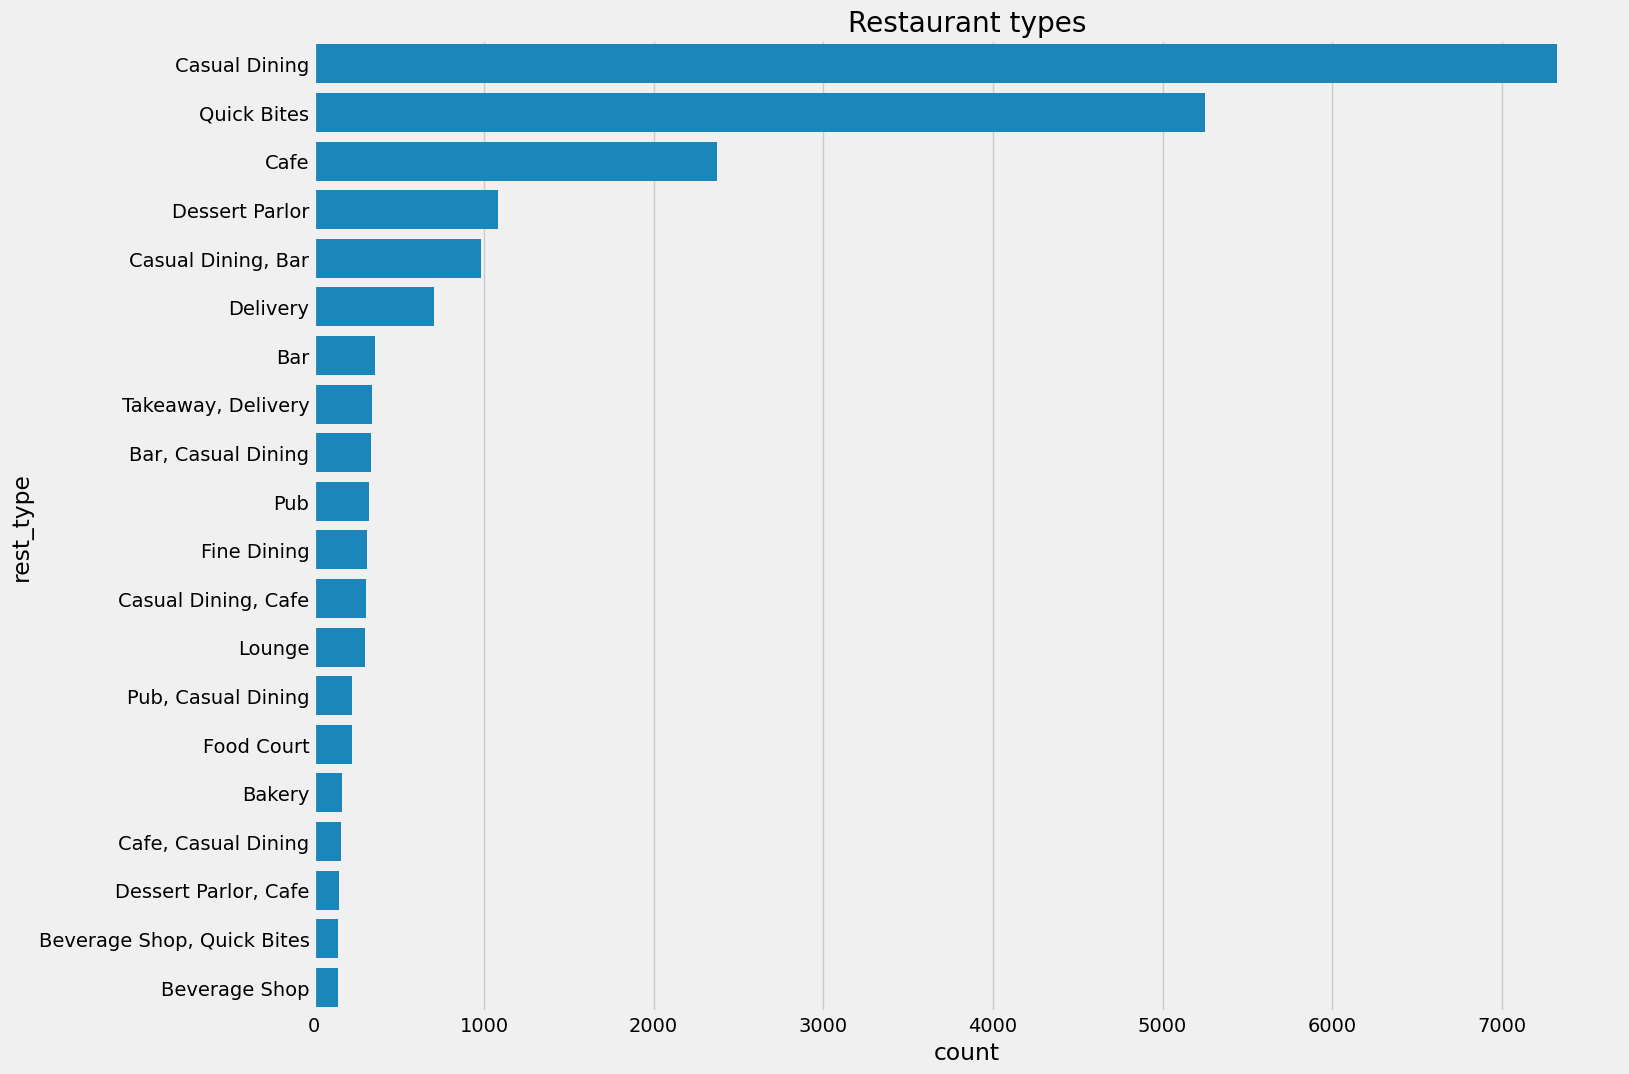

In [105]:
plt.figure(figsize=(15,12))
rest=df['rest_type'].value_counts()[:20]
sns.barplot(x= rest,y =rest.index)
plt.title("Restaurant types")
plt.xlabel("count")
plt.savefig('Restaurant types.png')
plt.show()


## Data Preprocessing:
_**Label Encoding the online order column from the dataset for fitting the algorithms**_

In [106]:
df['online_order']=df['online_order'].astype('category')
df['online_order']=df['online_order'].cat.codes

_**Label Encoding the book table column from the dataset for fitting the algorithms**_

In [107]:
df.book_table[df.book_table=='Yes']=1
df.book_table[df.book_table=='No']=0
df.book_table=pd.to_numeric(df.book_table)

_**Label Encoding all the required columns from the dataset for fitting the algorithms**_

In [108]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df.location=le.fit_transform(df.location)
df.rest_type=le.fit_transform(df.rest_type)
df.cuisines=le.fit_transform(df.cuisines)
df.menu_item=le.fit_transform(df.menu_item)

_**Getting all the required columns to the new dataframe and exporting it as a CSV file**_

In [109]:
new_df=df.iloc[:,[2,3,4,5,6,7,9,10,12]]
new_df.to_csv('Cleaned Data.csv',index=False)

_**Assigning the dependent and independent variable**_

In [110]:
x=df.iloc[:,[2,3,5,6,7,9,10,12]]
y=df['rate']

## Model Fitting:

_**Splitting the dependent variable & independent variable into training and test dataset using train test split**_

In [111]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

_**Fitting the Linear Regression model with the train dependent and train independent variable and getting the r2 Score between the predicted value and dependent test dataset.**_

In [112]:
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.2281882852296705

_**Fitting the Random Forest Regressor model with the train dependent and train independent variable and getting the r2 Score between the predicted value and dependent test dataset**_

In [113]:
from sklearn.ensemble import RandomForestRegressor
RF_Model=RandomForestRegressor(n_estimators=650,random_state=245,min_samples_leaf=.0001)
RF_Model.fit(x_train,y_train)
y_predict=RF_Model.predict(x_test)
display (r2_score(y_test,y_predict))

0.8812319751743685

_**Passing some of the list of parameters for the Random Forest Regressor Model to run with Randomized Search CV Algorithm**_

In [114]:
params={
    "n_estimators":[100,200,300,400,500,600,700,800],
    "max_features":['auto','sqrt'],
    "max_depth":[int(x) for x in np.linspace(5,30,num=6)],
    "min_samples_leaf":[1,2,5,10],
    "min_samples_split":[2,5,10,15,100],
    "min_weight_fraction_leaf":[0.0,0.1,0.2,0.3,0.4,0.5]
}

_**Fitting The Random Forest Regressor Model with the above mentioned parameters in the RandomizedSearchCV Algorithm**_

In [122]:
from sklearn.model_selection import RandomizedSearchCV
RF=RandomForestRegressor()
random_search=RandomizedSearchCV(RF,params,n_iter=100,scoring='roc_auc',n_jobs=-1,cv=10,verbose=3)
random_search.fit(x_train,y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 2/10] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=100;, score=nan total time=   0.4s
[CV 1/10] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=100;, score=nan total time=   0.4s
[CV 3/10] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=100;, score=nan total time=   0.4s
[CV 8/10] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=100;, score=nan total time=   0.3s
[CV 4/10] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=100;, score=nan total time=   0.4s
[CV 5/10] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=100;, score=nan total time=   0.4s
[CV 6/10] 

/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 9/10] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=100;, score=nan total time=   0.4s
[CV 10/10] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=100;, score=nan total time=   0.4s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 4/10] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, min_weight_fraction_leaf=0.3, n_estimators=800;, score=nan total time=   1.3s
[CV 1/10] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, min_weight_fraction_leaf=0.3, n_estimators=800;, score=nan total time=   1.4s
[CV 5/10] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, min_weight_fraction_leaf=0.3, n_estimators=800;, score=nan total time=   1.3s
[CV 2/10] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, min_weight_fraction_leaf=0.3, n_estimators=800;, score=nan total time=   1.4s
[CV 6/10] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, min_weight_fraction_leaf=0.3, n_estimators=800;, score=nan total time=   1.4s
[CV 3/10] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, min_weight_fraction_leaf=0.3, n_estimators=800;, score=nan total time=   1.5s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 7/10] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, min_weight_fraction_leaf=0.3, n_estimators=800;, score=nan total time=   1.4s
[CV 8/10] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, min_weight_fraction_leaf=0.3, n_estimators=800;, score=nan total time=   1.4s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 2/10] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, min_weight_fraction_leaf=0.3, n_estimators=700;, score=nan total time=   1.3s
[CV 1/10] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, min_weight_fraction_leaf=0.3, n_estimators=700;, score=nan total time=   1.3s
[CV 3/10] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, min_weight_fraction_leaf=0.3, n_estimators=700;, score=nan total time=   1.4s
[CV 9/10] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, min_weight_fraction_leaf=0.3, n_estimators=800;, score=nan total time=   1.5s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 4/10] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, min_weight_fraction_leaf=0.3, n_estimators=700;, score=nan total time=   1.4s
[CV 1/10] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=15, min_weight_fraction_leaf=0.1, n_estimators=600;, score=nan total time=   0.0s
[CV 10/10] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, min_weight_fraction_leaf=0.3, n_estimators=800;, score=nan total time=   1.5s
[CV 2/10] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=15, min_weight_fraction_leaf=0.1, n_estimators=600;, score=nan total time=   0.0s
[CV 3/10] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=15, min_weight_fraction_leaf=0.1, n_estimators=600;, score=nan total time=   0.0s
[CV 4/10] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=15, min_weight_fraction_leaf=0.1, n_estimators=600;, score=nan total time=  

/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 5/10] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, min_weight_fraction_leaf=0.3, n_estimators=700;, score=nan total time=   1.4s
[CV 6/10] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, min_weight_fraction_leaf=0.3, n_estimators=700;, score=nan total time=   1.5s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 8/10] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, min_weight_fraction_leaf=0.3, n_estimators=700;, score=nan total time=   1.3s
[CV 7/10] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, min_weight_fraction_leaf=0.3, n_estimators=700;, score=nan total time=   1.4s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 10/10] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, min_weight_fraction_leaf=0.3, n_estimators=700;, score=nan total time=   1.4s
[CV 9/10] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, min_weight_fraction_leaf=0.3, n_estimators=700;, score=nan total time=   1.5s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 1/10] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, min_weight_fraction_leaf=0.0, n_estimators=500;, score=nan total time=   2.1s
[CV 2/10] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, min_weight_fraction_leaf=0.0, n_estimators=500;, score=nan total time=   2.1s
[CV 3/10] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, min_weight_fraction_leaf=0.0, n_estimators=500;, score=nan total time=   2.0s
[CV 4/10] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, min_weight_fraction_leaf=0.0, n_estimators=500;, score=nan total time=   1.9s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 5/10] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, min_weight_fraction_leaf=0.0, n_estimators=500;, score=nan total time=   1.9s
[CV 6/10] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, min_weight_fraction_leaf=0.0, n_estimators=500;, score=nan total time=   1.9s
[CV 7/10] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, min_weight_fraction_leaf=0.0, n_estimators=500;, score=nan total time=   1.9s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 2/10] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, min_weight_fraction_leaf=0.2, n_estimators=500;, score=nan total time=   1.0s
[CV 1/10] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, min_weight_fraction_leaf=0.2, n_estimators=500;, score=nan total time=   1.2s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 8/10] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, min_weight_fraction_leaf=0.0, n_estimators=500;, score=nan total time=   2.0s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 10/10] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, min_weight_fraction_leaf=0.0, n_estimators=500;, score=nan total time=   1.8s
[CV 3/10] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, min_weight_fraction_leaf=0.2, n_estimators=500;, score=nan total time=   1.1s
[CV 9/10] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, min_weight_fraction_leaf=0.0, n_estimators=500;, score=nan total time=   2.0s
[CV 1/10] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=10, min_weight_fraction_leaf=0.1, n_estimators=400;, score=nan total time=   0.0s
[CV 2/10] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=10, min_weight_fraction_leaf=0.1, n_estimators=400;, score=nan total time=   0.0s
[CV 3/10] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=10, min_weight_fraction_leaf=0.1, n_estimators=400;, score=nan total time=  

/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 7/10] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, min_weight_fraction_leaf=0.2, n_estimators=500;, score=nan total time=   1.0s
[CV 8/10] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, min_weight_fraction_leaf=0.2, n_estimators=500;, score=nan total time=   1.0s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 9/10] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, min_weight_fraction_leaf=0.2, n_estimators=500;, score=nan total time=   1.0s
[CV 10/10] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, min_weight_fraction_leaf=0.2, n_estimators=500;, score=nan total time=   1.1s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 4/10] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, min_weight_fraction_leaf=0.4, n_estimators=800;, score=nan total time=   1.1s
[CV 2/10] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, min_weight_fraction_leaf=0.4, n_estimators=800;, score=nan total time=   1.1s
[CV 1/10] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=5, min_weight_fraction_leaf=0.0, n_estimators=700;, score=nan total time=   0.0s
[CV 2/10] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=5, min_weight_fraction_leaf=0.0, n_estimators=700;, score=nan total time=   0.0s
[CV 3/10] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, min_weight_fraction_leaf=0.4, n_estimators=800;, score=nan total time=   1.1s
[CV 3/10] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=5, min_weight_fraction_leaf=0.0, n_estimators=700;, score=nan total time=

/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 6/10] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, min_weight_fraction_leaf=0.4, n_estimators=800;, score=nan total time=   1.1s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 1/10] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, min_weight_fraction_leaf=0.3, n_estimators=200;, score=nan total time=   0.3s
[CV 7/10] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, min_weight_fraction_leaf=0.4, n_estimators=800;, score=nan total time=   1.1s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 9/10] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, min_weight_fraction_leaf=0.4, n_estimators=800;, score=nan total time=   1.1s
[CV 3/10] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, min_weight_fraction_leaf=0.2, n_estimators=400;, score=nan total time=   0.8s
[CV 1/10] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, min_weight_fraction_leaf=0.2, n_estimators=400;, score=nan total time=   0.8s
[CV 5/10] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, min_weight_fraction_leaf=0.2, n_estimators=400;, score=nan total time=   0.8s
[CV 9/10] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, min_weight_fraction_leaf=0.2, n_estimators=400;, score=nan total time=   0.8s
[CV 2/10] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, min_weight_fraction_leaf=0.3, n_estimators=200;, score=nan total time=   0.4s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 7/10] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, min_weight_fraction_leaf=0.2, n_estimators=400;, score=nan total time=   1.0s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 3/10] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, min_weight_fraction_leaf=0.3, n_estimators=200;, score=nan total time=   0.4s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 4/10] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, min_weight_fraction_leaf=0.3, n_estimators=200;, score=nan total time=   0.4s
[CV 4/10] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, min_weight_fraction_leaf=0.2, n_estimators=400;, score=nan total time=   0.8s
[CV 2/10] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, min_weight_fraction_leaf=0.2, n_estimators=400;, score=nan total time=   0.8s
[CV 6/10] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, min_weight_fraction_leaf=0.2, n_estimators=400;, score=nan total time=   0.8s
[CV 10/10] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, min_weight_fraction_leaf=0.2, n_estimators=400;, score=nan total time=   0.8s
[CV 8/10] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, min_weight_fraction_leaf=0.4, n_estimators=800;, score=nan total time=   1.1s
[CV 

/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 10/10] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, min_weight_fraction_leaf=0.4, n_estimators=800;, score=nan total time=   1.1s
[CV 5/10] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, min_weight_fraction_leaf=0.3, n_estimators=200;, score=nan total time=   0.4s
[CV 9/10] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, min_weight_fraction_leaf=0.3, n_estimators=200;, score=nan total time=   0.4s
[CV 7/10] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, min_weight_fraction_leaf=0.3, n_estimators=200;, score=nan total time=   0.4s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 1/10] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, min_weight_fraction_leaf=0.5, n_estimators=500;, score=nan total time=   0.7s
[CV 5/10] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, min_weight_fraction_leaf=0.5, n_estimators=500;, score=nan total time=   0.7s
[CV 6/10] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, min_weight_fraction_leaf=0.3, n_estimators=200;, score=nan total time=   0.4s
[CV 8/10] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, min_weight_fraction_leaf=0.3, n_estimators=200;, score=nan total time=   0.4s
[CV 10/10] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, min_weight_fraction_leaf=0.3, n_estimators=200;, score=nan total time=   0.4s
[CV 9/10] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, min_weight_fraction_leaf=0.5, n_estimators=500;, score=nan total time=   0.

/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 5/10] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, min_weight_fraction_leaf=0.5, n_estimators=200;, score=nan total time=   0.3s
[CV 1/10] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, min_weight_fraction_leaf=0.5, n_estimators=200;, score=nan total time=   0.3s
[CV 9/10] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, min_weight_fraction_leaf=0.5, n_estimators=200;, score=nan total time=   0.3s
[CV 3/10] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, min_weight_fraction_leaf=0.3, n_estimators=600;, score=nan total time=   1.1s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 6/10] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, min_weight_fraction_leaf=0.5, n_estimators=200;, score=nan total time=   0.2s
[CV 2/10] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, min_weight_fraction_leaf=0.5, n_estimators=200;, score=nan total time=   0.3s
[CV 7/10] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, min_weight_fraction_leaf=0.3, n_estimators=600;, score=nan total time=   1.2s
[CV 10/10] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, min_weight_fraction_leaf=0.5, n_estimators=200;, score=nan total time=   0.3s
[CV 1/10] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, min_weight_fraction_leaf=0.4, n_estimators=800;, score=nan total time=   0.0s
[CV 2/10] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, min_weight_fraction_leaf=0.4, n_estimators=800;, score=nan total time=   0

/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 8/10] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, min_weight_fraction_leaf=0.5, n_estimators=200;, score=nan total time=   0.3s
[CV 4/10] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, min_weight_fraction_leaf=0.5, n_estimators=200;, score=nan total time=   0.3s
[CV 3/10] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, min_weight_fraction_leaf=0.5, n_estimators=500;, score=nan total time=   0.6s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 7/10] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, min_weight_fraction_leaf=0.5, n_estimators=500;, score=nan total time=   0.7s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 4/10] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, min_weight_fraction_leaf=0.3, n_estimators=600;, score=nan total time=   1.1s
[CV 8/10] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, min_weight_fraction_leaf=0.3, n_estimators=600;, score=nan total time=   1.1s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 1/10] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, min_weight_fraction_leaf=0.3, n_estimators=600;, score=nan total time=   1.1s
[CV 4/10] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, min_weight_fraction_leaf=0.5, n_estimators=500;, score=nan total time=   0.7s
[CV 8/10] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, min_weight_fraction_leaf=0.5, n_estimators=500;, score=nan total time=   0.6s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 1/10] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, min_weight_fraction_leaf=0.2, n_estimators=800;, score=nan total time=   1.7s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 5/10] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, min_weight_fraction_leaf=0.3, n_estimators=600;, score=nan total time=   1.0s
[CV 5/10] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, min_weight_fraction_leaf=0.2, n_estimators=800;, score=nan total time=   1.7s
[CV 9/10] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, min_weight_fraction_leaf=0.3, n_estimators=600;, score=nan total time=   1.1s
[CV 9/10] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, min_weight_fraction_leaf=0.2, n_estimators=800;, score=nan total time=   1.6s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 2/10] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, min_weight_fraction_leaf=0.3, n_estimators=600;, score=nan total time=   1.1s
[CV 1/10] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=10, min_weight_fraction_leaf=0.2, n_estimators=200;, score=nan total time=   0.0s
[CV 2/10] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=10, min_weight_fraction_leaf=0.2, n_estimators=200;, score=nan total time=   0.0s
[CV 3/10] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=10, min_weight_fraction_leaf=0.2, n_estimators=200;, score=nan total time=   0.0s
[CV 4/10] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=10, min_weight_fraction_leaf=0.2, n_estimators=200;, score=nan total time=   0.0s
[CV 5/10] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=10, min_weight_fraction_leaf=0.2, n_estimators=200;, score=nan total time=   0.0s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 6/10] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, min_weight_fraction_leaf=0.3, n_estimators=600;, score=nan total time=   1.1s
[CV 1/10] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, min_weight_fraction_leaf=0.4, n_estimators=300;, score=nan total time=   0.4s
[CV 10/10] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, min_weight_fraction_leaf=0.3, n_estimators=600;, score=nan total time=   1.1s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 2/10] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, min_weight_fraction_leaf=0.2, n_estimators=800;, score=nan total time=   1.7s
[CV 3/10] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, min_weight_fraction_leaf=0.4, n_estimators=300;, score=nan total time=   0.4s
[CV 2/10] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, min_weight_fraction_leaf=0.4, n_estimators=300;, score=nan total time=   0.4s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 5/10] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, min_weight_fraction_leaf=0.4, n_estimators=300;, score=nan total time=   0.4s
[CV 6/10] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, min_weight_fraction_leaf=0.2, n_estimators=800;, score=nan total time=   1.7s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 4/10] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, min_weight_fraction_leaf=0.4, n_estimators=300;, score=nan total time=   0.4s
[CV 10/10] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, min_weight_fraction_leaf=0.2, n_estimators=800;, score=nan total time=   1.8s
[CV 7/10] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, min_weight_fraction_leaf=0.4, n_estimators=300;, score=nan total time=   0.5s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 6/10] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, min_weight_fraction_leaf=0.4, n_estimators=300;, score=nan total time=   0.5s
[CV 1/10] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=15, min_weight_fraction_leaf=0.4, n_estimators=700;, score=nan total time=   0.0s
[CV 2/10] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=15, min_weight_fraction_leaf=0.4, n_estimators=700;, score=nan total time=   0.0s
[CV 3/10] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=15, min_weight_fraction_leaf=0.4, n_estimators=700;, score=nan total time=   0.0s
[CV 4/10] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=15, min_weight_fraction_leaf=0.4, n_estimators=700;, score=nan total time=   0.0s
[CV 5/10] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=15, min_weight_fraction_leaf=0.4, n_estimators=700;, score=nan total time=   0.0

/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 3/10] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, min_weight_fraction_leaf=0.0, n_estimators=400;, score=nan total time=   3.3s
[CV 7/10] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, min_weight_fraction_leaf=0.0, n_estimators=400;, score=nan total time=   3.3s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 10/10] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, min_weight_fraction_leaf=0.4, n_estimators=300;, score=nan total time=   0.4s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 3/10] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, min_weight_fraction_leaf=0.2, n_estimators=800;, score=nan total time=   1.7s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 7/10] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, min_weight_fraction_leaf=0.2, n_estimators=800;, score=nan total time=   1.9s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 1/10] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, min_weight_fraction_leaf=0.2, n_estimators=800;, score=nan total time=   1.9s
[CV 3/10] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, min_weight_fraction_leaf=0.2, n_estimators=800;, score=nan total time=   2.0s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 7/10] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, min_weight_fraction_leaf=0.2, n_estimators=800;, score=nan total time=   1.9s
[CV 4/10] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, min_weight_fraction_leaf=0.2, n_estimators=800;, score=nan total time=   1.8s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 8/10] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, min_weight_fraction_leaf=0.2, n_estimators=800;, score=nan total time=   1.7s
[CV 1/10] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, min_weight_fraction_leaf=0.0, n_estimators=400;, score=nan total time=   3.5s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 4/10] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, min_weight_fraction_leaf=0.0, n_estimators=400;, score=nan total time=   3.4s
[CV 8/10] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, min_weight_fraction_leaf=0.0, n_estimators=400;, score=nan total time=   3.4s
[CV 2/10] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, min_weight_fraction_leaf=0.2, n_estimators=800;, score=nan total time=   1.7s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 4/10] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, min_weight_fraction_leaf=0.2, n_estimators=800;, score=nan total time=   1.7s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 8/10] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, min_weight_fraction_leaf=0.2, n_estimators=800;, score=nan total time=   1.7s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 1/10] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, min_weight_fraction_leaf=0.0, n_estimators=300;, score=nan total time=   2.2s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 5/10] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, min_weight_fraction_leaf=0.0, n_estimators=300;, score=nan total time=   2.3s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 5/10] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, min_weight_fraction_leaf=0.2, n_estimators=800;, score=nan total time=   1.9s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 9/10] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, min_weight_fraction_leaf=0.2, n_estimators=800;, score=nan total time=   1.8s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 9/10] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, min_weight_fraction_leaf=0.0, n_estimators=300;, score=nan total time=   2.5s
[CV 2/10] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, min_weight_fraction_leaf=0.0, n_estimators=400;, score=nan total time=   3.4s
[CV 3/10] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, min_weight_fraction_leaf=0.2, n_estimators=600;, score=nan total time=   0.0s
[CV 4/10] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, min_weight_fraction_leaf=0.2, n_estimators=600;, score=nan total time=   0.0s
[CV 5/10] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, min_weight_fraction_leaf=0.2, n_estimators=600;, score=nan total time=   0.0s
[CV 6/10] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, min_weight_fraction_leaf=0.2, n_estimators=600;, score=nan total time=   0.0

/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 2/10] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, min_weight_fraction_leaf=0.5, n_estimators=100;, score=nan total time=   0.1s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 3/10] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, min_weight_fraction_leaf=0.5, n_estimators=100;, score=nan total time=   0.2s
[CV 5/10] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, min_weight_fraction_leaf=0.0, n_estimators=400;, score=nan total time=   3.5s
[CV 2/10] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, min_weight_fraction_leaf=0.0, n_estimators=300;, score=nan total time=   2.4s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 4/10] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, min_weight_fraction_leaf=0.5, n_estimators=100;, score=nan total time=   0.2s
[CV 9/10] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, min_weight_fraction_leaf=0.0, n_estimators=400;, score=nan total time=   3.6s
[CV 5/10] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, min_weight_fraction_leaf=0.5, n_estimators=100;, score=nan total time=   0.1s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 6/10] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, min_weight_fraction_leaf=0.5, n_estimators=100;, score=nan total time=   0.1s
[CV 6/10] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, min_weight_fraction_leaf=0.2, n_estimators=800;, score=nan total time=   1.9s
[CV 7/10] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, min_weight_fraction_leaf=0.5, n_estimators=100;, score=nan total time=   0.1s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 8/10] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, min_weight_fraction_leaf=0.5, n_estimators=100;, score=nan total time=   0.2s
[CV 6/10] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, min_weight_fraction_leaf=0.0, n_estimators=300;, score=nan total time=   2.5s
[CV 9/10] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, min_weight_fraction_leaf=0.5, n_estimators=100;, score=nan total time=   0.2s
[CV 10/10] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, min_weight_fraction_leaf=0.2, n_estimators=800;, score=nan total time=   1.9s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 10/10] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, min_weight_fraction_leaf=0.5, n_estimators=100;, score=nan total time=   0.1s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 10/10] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, min_weight_fraction_leaf=0.0, n_estimators=300;, score=nan total time=   2.5s
[CV 1/10] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, min_weight_fraction_leaf=0.2, n_estimators=600;, score=nan total time=   0.0s
[CV 2/10] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, min_weight_fraction_leaf=0.2, n_estimators=600;, score=nan total time=   0.0s
[CV 3/10] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, min_weight_fraction_leaf=0.3, n_estimators=500;, score=nan total time=   1.0s
[CV 1/10] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=2, min_weight_fraction_leaf=0.5, n_estimators=200;, score=nan total time=   0.0s
[CV 2/10] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=2, min_weight_fraction_leaf=0.5, n_estimators=200;, score=nan total time=   0.

/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 1/10] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, min_weight_fraction_leaf=0.3, n_estimators=500;, score=nan total time=   1.0s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 3/10] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, min_weight_fraction_leaf=0.0, n_estimators=300;, score=nan total time=   2.4s
[CV 1/10] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, min_weight_fraction_leaf=0.0, n_estimators=100;, score=nan total time=   0.7s
[CV 4/10] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, min_weight_fraction_leaf=0.3, n_estimators=500;, score=nan total time=   1.0s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 8/10] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, min_weight_fraction_leaf=0.3, n_estimators=500;, score=nan total time=   0.9s
[CV 2/10] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, min_weight_fraction_leaf=0.3, n_estimators=500;, score=nan total time=   1.0s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 7/10] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, min_weight_fraction_leaf=0.0, n_estimators=300;, score=nan total time=   2.4s
[CV 2/10] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, min_weight_fraction_leaf=0.0, n_estimators=100;, score=nan total time=   0.7s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 6/10] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, min_weight_fraction_leaf=0.0, n_estimators=400;, score=nan total time=   3.5s
[CV 10/10] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, min_weight_fraction_leaf=0.0, n_estimators=400;, score=nan total time=   3.4s
[CV 5/10] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, min_weight_fraction_leaf=0.3, n_estimators=500;, score=nan total time=   0.9s
[CV 3/10] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, min_weight_fraction_leaf=0.0, n_estimators=100;, score=nan total time=   0.6s
[CV 9/10] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, min_weight_fraction_leaf=0.3, n_estimators=500;, score=nan total time=   0.8s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 4/10] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, min_weight_fraction_leaf=0.0, n_estimators=100;, score=nan total time=   0.6s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 5/10] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, min_weight_fraction_leaf=0.0, n_estimators=100;, score=nan total time=   0.6s
[CV 6/10] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, min_weight_fraction_leaf=0.0, n_estimators=100;, score=nan total time=   0.7s
[CV 7/10] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, min_weight_fraction_leaf=0.0, n_estimators=100;, score=nan total time=   0.7s
[CV 1/10] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=2, min_weight_fraction_leaf=0.2, n_estimators=700;, score=nan total time=   0.0s
[CV 2/10] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=2, min_weight_fraction_leaf=0.2, n_estimators=700;, score=nan total time=   0.0s
[CV 3/10] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=2, min_weight_fraction_leaf=0.2, n_estimators=700;, score=nan total time=   0.0

/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 10/10] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, min_weight_fraction_leaf=0.3, n_estimators=500;, score=nan total time=   0.9s
[CV 4/10] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, min_weight_fraction_leaf=0.0, n_estimators=300;, score=nan total time=   2.2s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 9/10] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, min_weight_fraction_leaf=0.0, n_estimators=100;, score=nan total time=   0.7s
[CV 10/10] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, min_weight_fraction_leaf=0.0, n_estimators=100;, score=nan total time=   0.7s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 8/10] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, min_weight_fraction_leaf=0.0, n_estimators=300;, score=nan total time=   2.2s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 1/10] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, min_weight_fraction_leaf=0.0, n_estimators=700;, score=nan total time=   2.7s
[CV 2/10] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, min_weight_fraction_leaf=0.0, n_estimators=700;, score=nan total time=   2.8s
[CV 3/10] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, min_weight_fraction_leaf=0.0, n_estimators=700;, score=nan total time=   2.7s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 4/10] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, min_weight_fraction_leaf=0.0, n_estimators=700;, score=nan total time=   2.7s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 5/10] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, min_weight_fraction_leaf=0.0, n_estimators=700;, score=nan total time=   2.8s
[CV 7/10] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, min_weight_fraction_leaf=0.0, n_estimators=700;, score=nan total time=   2.8s
[CV 6/10] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, min_weight_fraction_leaf=0.0, n_estimators=700;, score=nan total time=   2.8s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 8/10] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, min_weight_fraction_leaf=0.0, n_estimators=700;, score=nan total time=   2.8s
[CV 1/10] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, min_weight_fraction_leaf=0.5, n_estimators=700;, score=nan total time=   1.1s
[CV 2/10] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, min_weight_fraction_leaf=0.5, n_estimators=700;, score=nan total time=   1.1s
[CV 4/10] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, min_weight_fraction_leaf=0.5, n_estimators=700;, score=nan total time=   0.9s
[CV 3/10] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, min_weight_fraction_leaf=0.5, n_estimators=700;, score=nan total time=   1.0s
[CV 5/10] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, min_weight_fraction_leaf=0.5, n_estimators=700;, score=nan total time=   1.0s
[C

/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 6/10] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, min_weight_fraction_leaf=0.5, n_estimators=700;, score=nan total time=   0.9s
[CV 7/10] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, min_weight_fraction_leaf=0.5, n_estimators=700;, score=nan total time=   1.0s
[CV 1/10] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, min_weight_fraction_leaf=0.5, n_estimators=400;, score=nan total time=   0.5s
[CV 8/10] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, min_weight_fraction_leaf=0.5, n_estimators=700;, score=nan total time=   0.9s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 9/10] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, min_weight_fraction_leaf=0.5, n_estimators=700;, score=nan total time=   0.9s
[CV 10/10] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, min_weight_fraction_leaf=0.5, n_estimators=700;, score=nan total time=   0.9s
[CV 2/10] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, min_weight_fraction_leaf=0.5, n_estimators=400;, score=nan total time=   0.5s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 3/10] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, min_weight_fraction_leaf=0.5, n_estimators=400;, score=nan total time=   0.5s
[CV 9/10] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, min_weight_fraction_leaf=0.0, n_estimators=700;, score=nan total time=   2.8s
[CV 4/10] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, min_weight_fraction_leaf=0.5, n_estimators=400;, score=nan total time=   0.6s
[CV 1/10] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=15, min_weight_fraction_leaf=0.1, n_estimators=700;, score=nan total time=   0.0s
[CV 2/10] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=15, min_weight_fraction_leaf=0.1, n_estimators=700;, score=nan total time=   0.0s
[CV 3/10] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=15, min_weight_fraction_leaf=0.1, n_estimators=700;, score=nan total time=   0.0s

/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 10/10] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, min_weight_fraction_leaf=0.0, n_estimators=700;, score=nan total time=   2.8s
[CV 6/10] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, min_weight_fraction_leaf=0.5, n_estimators=400;, score=nan total time=   0.5s
[CV 7/10] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, min_weight_fraction_leaf=0.5, n_estimators=400;, score=nan total time=   0.5s
[CV 8/10] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, min_weight_fraction_leaf=0.5, n_estimators=400;, score=nan total time=   0.5s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 9/10] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, min_weight_fraction_leaf=0.5, n_estimators=400;, score=nan total time=   0.5s
[CV 10/10] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, min_weight_fraction_leaf=0.5, n_estimators=400;, score=nan total time=   0.5s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 1/10] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, min_weight_fraction_leaf=0.2, n_estimators=500;, score=nan total time=   1.0s
[CV 2/10] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, min_weight_fraction_leaf=0.2, n_estimators=500;, score=nan total time=   1.1s
[CV 4/10] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, min_weight_fraction_leaf=0.2, n_estimators=500;, score=nan total time=   1.0s
[CV 1/10] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=15, min_weight_fraction_leaf=0.3, n_estimators=600;, score=nan total time=   0.0s
[CV 5/10] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, min_weight_fraction_leaf=0.2, n_estimators=500;, score=nan total time=   1.0s
[CV 3/10] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, min_weight_fraction_leaf=0.2, n_estimators=500;, score=nan total time=   1.0

/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 6/10] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, min_weight_fraction_leaf=0.2, n_estimators=500;, score=nan total time=   1.0s
[CV 8/10] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, min_weight_fraction_leaf=0.2, n_estimators=500;, score=nan total time=   1.0s
[CV 7/10] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, min_weight_fraction_leaf=0.2, n_estimators=500;, score=nan total time=   1.1s
[CV 9/10] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, min_weight_fraction_leaf=0.2, n_estimators=500;, score=nan total time=   1.0s
[CV 10/10] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, min_weight_fraction_leaf=0.2, n_estimators=500;, score=nan total time=   1.0s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 3/10] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, min_weight_fraction_leaf=0.1, n_estimators=500;, score=nan total time=   1.4s
[CV 2/10] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, min_weight_fraction_leaf=0.1, n_estimators=500;, score=nan total time=   1.4s
[CV 1/10] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, min_weight_fraction_leaf=0.1, n_estimators=500;, score=nan total time=   1.4s
[CV 1/10] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=2, min_weight_fraction_leaf=0.4, n_estimators=200;, score=nan total time=   0.0s
[CV 2/10] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=2, min_weight_fraction_leaf=0.4, n_estimators=200;, score=nan total time=   0.0s
[CV 3/10] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=2, min_weight_fraction_leaf=0.4, n_estimators=200;, score=nan total time=   0.0s
[

/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 5/10] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, min_weight_fraction_leaf=0.1, n_estimators=500;, score=nan total time=   1.4s
[CV 6/10] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, min_weight_fraction_leaf=0.1, n_estimators=500;, score=nan total time=   1.4s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 8/10] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, min_weight_fraction_leaf=0.1, n_estimators=500;, score=nan total time=   1.4s
[CV 7/10] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, min_weight_fraction_leaf=0.1, n_estimators=500;, score=nan total time=   1.5s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 2/10] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, min_weight_fraction_leaf=0.3, n_estimators=600;, score=nan total time=   1.1s
[CV 1/10] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, min_weight_fraction_leaf=0.3, n_estimators=600;, score=nan total time=   1.2s
[CV 9/10] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, min_weight_fraction_leaf=0.1, n_estimators=500;, score=nan total time=   1.4s
[CV 10/10] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, min_weight_fraction_leaf=0.1, n_estimators=500;, score=nan total time=   1.4s
[CV 4/10] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, min_weight_fraction_leaf=0.3, n_estimators=600;, score=nan total time=   1.1s
[CV 1/10] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.2, n_estimators=500;, score=nan total time=   0.0s
[CV

/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 6/10] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, min_weight_fraction_leaf=0.2, n_estimators=600;, score=nan total time=   0.0s
[CV 7/10] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, min_weight_fraction_leaf=0.2, n_estimators=600;, score=nan total time=   0.0s
[CV 8/10] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, min_weight_fraction_leaf=0.2, n_estimators=600;, score=nan total time=   0.0s
[CV 9/10] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, min_weight_fraction_leaf=0.2, n_estimators=600;, score=nan total time=   0.0s
[CV 10/10] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, min_weight_fraction_leaf=0.2, n_estimators=600;, score=nan total time=   0.0s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 5/10] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, min_weight_fraction_leaf=0.3, n_estimators=600;, score=nan total time=   1.1s
[CV 6/10] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, min_weight_fraction_leaf=0.3, n_estimators=600;, score=nan total time=   1.1s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 8/10] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, min_weight_fraction_leaf=0.3, n_estimators=600;, score=nan total time=   1.0s
[CV 7/10] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, min_weight_fraction_leaf=0.3, n_estimators=600;, score=nan total time=   1.1s
[CV 1/10] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.2, n_estimators=300;, score=nan total time=   0.7s
[CV 3/10] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.2, n_estimators=300;, score=nan total time=   0.7s
[CV 9/10] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, min_weight_fraction_leaf=0.3, n_estimators=600;, score=nan total time=   1.1s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 10/10] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, min_weight_fraction_leaf=0.3, n_estimators=600;, score=nan total time=   1.1s
[CV 7/10] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.2, n_estimators=300;, score=nan total time=   0.6s
[CV 5/10] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.2, n_estimators=300;, score=nan total time=   0.7s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 9/10] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.2, n_estimators=300;, score=nan total time=   0.6s
[CV 4/10] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.2, n_estimators=300;, score=nan total time=   0.6s
[CV 2/10] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.2, n_estimators=300;, score=nan total time=   0.7s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 1/10] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, min_weight_fraction_leaf=0.1, n_estimators=300;, score=nan total time=   0.9s
[CV 8/10] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.2, n_estimators=300;, score=nan total time=   0.6s
[CV 6/10] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.2, n_estimators=300;, score=nan total time=   0.6s
[CV 3/10] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, min_weight_fraction_leaf=0.1, n_estimators=300;, score=nan total time=   0.9s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 1/10] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, min_weight_fraction_leaf=0.3, n_estimators=100;, score=nan total time=   0.2s
[CV 5/10] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, min_weight_fraction_leaf=0.1, n_estimators=300;, score=nan total time=   0.8s
[CV 3/10] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, min_weight_fraction_leaf=0.3, n_estimators=100;, score=nan total time=   0.2s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 10/10] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.2, n_estimators=300;, score=nan total time=   0.7s
[CV 2/10] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, min_weight_fraction_leaf=0.3, n_estimators=100;, score=nan total time=   0.2s
[CV 4/10] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, min_weight_fraction_leaf=0.3, n_estimators=100;, score=nan total time=   0.2s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 5/10] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, min_weight_fraction_leaf=0.3, n_estimators=100;, score=nan total time=   0.2s
[CV 7/10] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, min_weight_fraction_leaf=0.3, n_estimators=100;, score=nan total time=   0.2s
[CV 7/10] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, min_weight_fraction_leaf=0.1, n_estimators=300;, score=nan total time=   0.9s
[CV 9/10] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, min_weight_fraction_leaf=0.3, n_estimators=100;, score=nan total time=   0.2s
[CV 9/10] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, min_weight_fraction_leaf=0.1, n_estimators=300;, score=nan total time=   0.9s
[CV 6/10] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, min_weight_fraction_leaf=0.3, n_estimators=100;, score=nan total time=   0.2s
[C

/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 6/10] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, min_weight_fraction_leaf=0.1, n_estimators=300;, score=nan total time=   0.9s
[CV 4/10] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, min_weight_fraction_leaf=0.1, n_estimators=300;, score=nan total time=   0.9s
[CV 4/10] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, min_weight_fraction_leaf=0.5, n_estimators=100;, score=nan total time=   0.1s
[CV 2/10] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, min_weight_fraction_leaf=0.5, n_estimators=100;, score=nan total time=   0.1s
[CV 8/10] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, min_weight_fraction_leaf=0.5, n_estimators=100;, score=nan total time=   0.1s
[CV 5/10] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, min_weight_fraction_leaf=0.5, n_estimators=100;, score=nan total time=   0.1s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 9/10] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, min_weight_fraction_leaf=0.5, n_estimators=100;, score=nan total time=   0.1s
[CV 6/10] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, min_weight_fraction_leaf=0.5, n_estimators=100;, score=nan total time=   0.1s
[CV 10/10] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, min_weight_fraction_leaf=0.5, n_estimators=100;, score=nan total time=   0.2s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 8/10] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, min_weight_fraction_leaf=0.1, n_estimators=300;, score=nan total time=   0.9s
[CV 10/10] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, min_weight_fraction_leaf=0.1, n_estimators=300;, score=nan total time=   0.9s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 1/10] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, min_weight_fraction_leaf=0.2, n_estimators=800;, score=nan total time=   1.7s
[CV 7/10] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, min_weight_fraction_leaf=0.2, n_estimators=800;, score=nan total time=   1.7s
[CV 3/10] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, min_weight_fraction_leaf=0.2, n_estimators=800;, score=nan total time=   1.7s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 2/10] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, min_weight_fraction_leaf=0.2, n_estimators=800;, score=nan total time=   1.7s
[CV 1/10] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, min_weight_fraction_leaf=0.0, n_estimators=400;, score=nan total time=   3.3s
[CV 4/10] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, min_weight_fraction_leaf=0.2, n_estimators=800;, score=nan total time=   1.7s
[CV 8/10] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, min_weight_fraction_leaf=0.2, n_estimators=800;, score=nan total time=   1.7s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 5/10] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, min_weight_fraction_leaf=0.0, n_estimators=400;, score=nan total time=   3.3s
[CV 9/10] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, min_weight_fraction_leaf=0.0, n_estimators=400;, score=nan total time=   3.4s
[CV 1/10] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, min_weight_fraction_leaf=0.1, n_estimators=200;, score=nan total time=   0.5s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 2/10] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, min_weight_fraction_leaf=0.1, n_estimators=200;, score=nan total time=   0.6s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 7/10] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, min_weight_fraction_leaf=0.0, n_estimators=500;, score=nan total time=   4.2s
[CV 3/10] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, min_weight_fraction_leaf=0.0, n_estimators=500;, score=nan total time=   4.3s
[CV 3/10] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, min_weight_fraction_leaf=0.1, n_estimators=200;, score=nan total time=   0.6s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 9/10] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, min_weight_fraction_leaf=0.2, n_estimators=800;, score=nan total time=   1.7s
[CV 5/10] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, min_weight_fraction_leaf=0.2, n_estimators=800;, score=nan total time=   1.7s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 4/10] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, min_weight_fraction_leaf=0.1, n_estimators=200;, score=nan total time=   0.5s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 5/10] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, min_weight_fraction_leaf=0.1, n_estimators=200;, score=nan total time=   0.6s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 6/10] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, min_weight_fraction_leaf=0.1, n_estimators=200;, score=nan total time=   0.6s
[CV 10/10] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, min_weight_fraction_leaf=0.2, n_estimators=800;, score=nan total time=   1.7s
[CV 6/10] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, min_weight_fraction_leaf=0.2, n_estimators=800;, score=nan total time=   1.7s
[CV 2/10] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, min_weight_fraction_leaf=0.0, n_estimators=400;, score=nan total time=   3.4s
[CV 3/10] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=100, min_weight_fraction_leaf=0.2, n_estimators=800;, score=nan total time=   0.0s
[CV 4/10] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=100, min_weight_fraction_leaf=0.2, n_estimators=800;, score=nan total time=   0.

/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 6/10] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, min_weight_fraction_leaf=0.0, n_estimators=400;, score=nan total time=   3.3s
[CV 10/10] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, min_weight_fraction_leaf=0.0, n_estimators=400;, score=nan total time=   3.3s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 7/10] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, min_weight_fraction_leaf=0.1, n_estimators=200;, score=nan total time=   0.6s
[CV 9/10] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, min_weight_fraction_leaf=0.1, n_estimators=200;, score=nan total time=   0.6s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 1/10] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, min_weight_fraction_leaf=0.3, n_estimators=400;, score=nan total time=   0.7s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 8/10] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, min_weight_fraction_leaf=0.1, n_estimators=200;, score=nan total time=   0.6s
[CV 10/10] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, min_weight_fraction_leaf=0.1, n_estimators=200;, score=nan total time=   0.6s
[CV 1/10] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=100, min_weight_fraction_leaf=0.2, n_estimators=800;, score=nan total time=   0.0s
[CV 2/10] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=100, min_weight_fraction_leaf=0.2, n_estimators=800;, score=nan total time=   0.0s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 2/10] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, min_weight_fraction_leaf=0.3, n_estimators=400;, score=nan total time=   0.7s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 5/10] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, min_weight_fraction_leaf=0.3, n_estimators=400;, score=nan total time=   0.7s
[CV 9/10] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, min_weight_fraction_leaf=0.3, n_estimators=400;, score=nan total time=   0.7s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 3/10] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, min_weight_fraction_leaf=0.3, n_estimators=400;, score=nan total time=   0.7s
[CV 4/10] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, min_weight_fraction_leaf=0.0, n_estimators=500;, score=nan total time=   4.3s
[CV 8/10] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, min_weight_fraction_leaf=0.0, n_estimators=500;, score=nan total time=   4.3s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 6/10] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, min_weight_fraction_leaf=0.3, n_estimators=400;, score=nan total time=   0.7s
[CV 10/10] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, min_weight_fraction_leaf=0.3, n_estimators=400;, score=nan total time=   0.7s
[CV 1/10] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, min_weight_fraction_leaf=0.0, n_estimators=600;, score=nan total time=   0.0s
[CV 2/10] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, min_weight_fraction_leaf=0.0, n_estimators=600;, score=nan total time=   0.0s
[CV 3/10] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, min_weight_fraction_leaf=0.0, n_estimators=600;, score=nan total time=   0.0s
[CV 4/10] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, min_weight_fraction_leaf=0.0, n_estimators=600;, score=nan total time=   

/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 1/10] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, min_weight_fraction_leaf=0.4, n_estimators=100;, score=nan total time=   0.2s
[CV 4/10] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, min_weight_fraction_leaf=0.3, n_estimators=400;, score=nan total time=   0.7s
[CV 2/10] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, min_weight_fraction_leaf=0.4, n_estimators=100;, score=nan total time=   0.1s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 3/10] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, min_weight_fraction_leaf=0.4, n_estimators=100;, score=nan total time=   0.2s
[CV 4/10] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, min_weight_fraction_leaf=0.4, n_estimators=100;, score=nan total time=   0.1s
[CV 7/10] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, min_weight_fraction_leaf=0.3, n_estimators=400;, score=nan total time=   0.7s
[CV 5/10] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, min_weight_fraction_leaf=0.4, n_estimators=100;, score=nan total time=   0.2s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 6/10] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, min_weight_fraction_leaf=0.4, n_estimators=100;, score=nan total time=   0.1s
[CV 7/10] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, min_weight_fraction_leaf=0.4, n_estimators=100;, score=nan total time=   0.1s
[CV 3/10] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, min_weight_fraction_leaf=0.0, n_estimators=400;, score=nan total time=   3.4s
[CV 7/10] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, min_weight_fraction_leaf=0.0, n_estimators=400;, score=nan total time=   3.3s
[CV 8/10] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, min_weight_fraction_leaf=0.4, n_estimators=100;, score=nan total time=   0.1s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 9/10] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, min_weight_fraction_leaf=0.4, n_estimators=100;, score=nan total time=   0.1s
[CV 10/10] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, min_weight_fraction_leaf=0.4, n_estimators=100;, score=nan total time=   0.2s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 8/10] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, min_weight_fraction_leaf=0.3, n_estimators=400;, score=nan total time=   0.9s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 1/10] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, min_weight_fraction_leaf=0.0, n_estimators=500;, score=nan total time=   4.7s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 9/10] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, min_weight_fraction_leaf=0.0, n_estimators=500;, score=nan total time=   4.7s
[CV 4/10] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, min_weight_fraction_leaf=0.0, n_estimators=400;, score=nan total time=   3.7s
[CV 5/10] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, min_weight_fraction_leaf=0.0, n_estimators=500;, score=nan total time=   4.8s
[CV 8/10] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, min_weight_fraction_leaf=0.0, n_estimators=400;, score=nan total time=   3.8s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 2/10] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, min_weight_fraction_leaf=0.0, n_estimators=500;, score=nan total time=   4.4s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 2/10] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=600;, score=nan total time=   6.9s
[CV 1/10] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=600;, score=nan total time=   7.0s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 3/10] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=600;, score=nan total time=   6.8s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 10/10] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, min_weight_fraction_leaf=0.0, n_estimators=500;, score=nan total time=   4.3s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 6/10] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, min_weight_fraction_leaf=0.0, n_estimators=500;, score=nan total time=   4.5s
[CV 1/10] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=15, min_weight_fraction_leaf=0.3, n_estimators=700;, score=nan total time=   0.0s
[CV 2/10] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=15, min_weight_fraction_leaf=0.3, n_estimators=700;, score=nan total time=   0.0s
[CV 3/10] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=15, min_weight_fraction_leaf=0.3, n_estimators=700;, score=nan total time=   0.0s
[CV 4/10] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=15, min_weight_fraction_leaf=0.3, n_estimators=700;, score=nan total time=   0.0s
[CV 5/10] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=15, min_weight_fraction_leaf=0.3, n_estimators=700;, score=nan total time=   0.0s

/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 1/10] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, min_weight_fraction_leaf=0.1, n_estimators=400;, score=nan total time=   1.2s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 4/10] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=600;, score=nan total time=   7.0s
[CV 5/10] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=600;, score=nan total time=   7.0s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 2/10] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, min_weight_fraction_leaf=0.1, n_estimators=400;, score=nan total time=   1.4s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 3/10] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, min_weight_fraction_leaf=0.1, n_estimators=400;, score=nan total time=   1.2s
[CV 4/10] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, min_weight_fraction_leaf=0.1, n_estimators=400;, score=nan total time=   1.2s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 5/10] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, min_weight_fraction_leaf=0.1, n_estimators=400;, score=nan total time=   1.2s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 6/10] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=600;, score=nan total time=   7.0s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 6/10] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, min_weight_fraction_leaf=0.1, n_estimators=400;, score=nan total time=   1.3s
[CV 7/10] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, min_weight_fraction_leaf=0.1, n_estimators=400;, score=nan total time=   1.3s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 1/10] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, min_weight_fraction_leaf=0.5, n_estimators=100;, score=nan total time=   0.1s
[CV 8/10] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, min_weight_fraction_leaf=0.1, n_estimators=400;, score=nan total time=   1.3s
[CV 2/10] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, min_weight_fraction_leaf=0.5, n_estimators=100;, score=nan total time=   0.1s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 3/10] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, min_weight_fraction_leaf=0.5, n_estimators=100;, score=nan total time=   0.1s
[CV 4/10] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, min_weight_fraction_leaf=0.5, n_estimators=100;, score=nan total time=   0.1s
[CV 5/10] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, min_weight_fraction_leaf=0.5, n_estimators=100;, score=nan total time=   0.1s
[CV 6/10] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, min_weight_fraction_leaf=0.5, n_estimators=100;, score=nan total time=   0.1s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 7/10] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, min_weight_fraction_leaf=0.5, n_estimators=100;, score=nan total time=   0.1s
[CV 7/10] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=600;, score=nan total time=   6.9s
[CV 8/10] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, min_weight_fraction_leaf=0.5, n_estimators=100;, score=nan total time=   0.1s
[CV 1/10] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=100, min_weight_fraction_leaf=0.0, n_estimators=200;, score=nan total time=   0.0s
[CV 2/10] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=100, min_weight_fraction_leaf=0.0, n_estimators=200;, score=nan total time=   0.0s
[CV 3/10] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=100, min_weight_fraction_leaf=0.0, n_estimators=200;, score=nan total time= 

/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 10/10] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, min_weight_fraction_leaf=0.1, n_estimators=400;, score=nan total time=   1.2s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 10/10] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=600;, score=nan total time=   7.0s
[CV 1/10] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, min_weight_fraction_leaf=0.5, n_estimators=500;, score=nan total time=   0.7s
[CV 2/10] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, min_weight_fraction_leaf=0.5, n_estimators=500;, score=nan total time=   0.8s
[CV 4/10] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, min_weight_fraction_leaf=0.5, n_estimators=500;, score=nan total time=   0.8s
[CV 3/10] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, min_weight_fraction_leaf=0.5, n_estimators=500;, score=nan total time=   0.8s
[CV 5/10] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, min_weight_fraction_leaf=0.5, n_estimators=500;, score=nan total t

/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 6/10] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, min_weight_fraction_leaf=0.5, n_estimators=500;, score=nan total time=   0.7s
[CV 7/10] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, min_weight_fraction_leaf=0.5, n_estimators=500;, score=nan total time=   0.8s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 8/10] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, min_weight_fraction_leaf=0.5, n_estimators=500;, score=nan total time=   0.8s
[CV 9/10] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, min_weight_fraction_leaf=0.5, n_estimators=500;, score=nan total time=   0.8s
[CV 10/10] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, min_weight_fraction_leaf=0.5, n_estimators=500;, score=nan total time=   0.9s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 1/10] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, min_weight_fraction_leaf=0.5, n_estimators=600;, score=nan total time=   1.0s
[CV 2/10] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, min_weight_fraction_leaf=0.5, n_estimators=600;, score=nan total time=   0.9s
[CV 3/10] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, min_weight_fraction_leaf=0.5, n_estimators=600;, score=nan total time=   0.9s
[CV 1/10] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, min_weight_fraction_leaf=0.5, n_estimators=700;, score=nan total time=   0.0s
[CV 2/10] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, min_weight_fraction_leaf=0.5, n_estimators=700;, score=nan total time=   0.0s
[CV 3/10] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, min_weight_fraction_leaf=0.5, n_estimators=700;, score=nan total time=   0.0s
[

/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 5/10] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, min_weight_fraction_leaf=0.5, n_estimators=600;, score=nan total time=   1.0s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 6/10] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, min_weight_fraction_leaf=0.5, n_estimators=600;, score=nan total time=   0.9s
[CV 7/10] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, min_weight_fraction_leaf=0.5, n_estimators=600;, score=nan total time=   0.9s
[CV 8/10] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, min_weight_fraction_leaf=0.5, n_estimators=600;, score=nan total time=   1.0s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 9/10] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, min_weight_fraction_leaf=0.5, n_estimators=600;, score=nan total time=   0.9s
[CV 10/10] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, min_weight_fraction_leaf=0.5, n_estimators=600;, score=nan total time=   0.9s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 1/10] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, min_weight_fraction_leaf=0.1, n_estimators=400;, score=nan total time=   1.3s
[CV 2/10] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, min_weight_fraction_leaf=0.1, n_estimators=400;, score=nan total time=   1.3s
[CV 3/10] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, min_weight_fraction_leaf=0.1, n_estimators=400;, score=nan total time=   1.3s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 4/10] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, min_weight_fraction_leaf=0.1, n_estimators=400;, score=nan total time=   1.3s
[CV 1/10] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, min_weight_fraction_leaf=0.2, n_estimators=200;, score=nan total time=   0.5s
[CV 5/10] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, min_weight_fraction_leaf=0.1, n_estimators=400;, score=nan total time=   1.3s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 6/10] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, min_weight_fraction_leaf=0.1, n_estimators=400;, score=nan total time=   1.3s
[CV 8/10] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, min_weight_fraction_leaf=0.1, n_estimators=400;, score=nan total time=   1.3s
[CV 7/10] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, min_weight_fraction_leaf=0.1, n_estimators=400;, score=nan total time=   1.4s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 2/10] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, min_weight_fraction_leaf=0.2, n_estimators=200;, score=nan total time=   0.5s
[CV 3/10] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, min_weight_fraction_leaf=0.2, n_estimators=200;, score=nan total time=   0.5s
[CV 4/10] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, min_weight_fraction_leaf=0.2, n_estimators=200;, score=nan total time=   0.5s
[CV 5/10] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, min_weight_fraction_leaf=0.2, n_estimators=200;, score=nan total time=   0.5s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 10/10] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, min_weight_fraction_leaf=0.1, n_estimators=400;, score=nan total time=   1.2s
[CV 9/10] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, min_weight_fraction_leaf=0.1, n_estimators=400;, score=nan total time=   1.3s
[CV 6/10] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, min_weight_fraction_leaf=0.2, n_estimators=200;, score=nan total time=   0.5s
[CV 7/10] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, min_weight_fraction_leaf=0.2, n_estimators=200;, score=nan total time=   0.5s
[CV 1/10] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, min_weight_fraction_leaf=0.3, n_estimators=100;, score=nan total time=   0.2s
[CV 2/10] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, min_weight_fraction_leaf=0.3, n_estimators=100;, score=nan total time=   0.2s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 3/10] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, min_weight_fraction_leaf=0.3, n_estimators=100;, score=nan total time=   0.2s
[CV 8/10] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, min_weight_fraction_leaf=0.2, n_estimators=200;, score=nan total time=   0.5s
[CV 4/10] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, min_weight_fraction_leaf=0.3, n_estimators=100;, score=nan total time=   0.2s
[CV 5/10] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, min_weight_fraction_leaf=0.3, n_estimators=100;, score=nan total time=   0.2s
[CV 9/10] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, min_weight_fraction_leaf=0.2, n_estimators=200;, score=nan total time=   0.5s
[CV 10/10] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, min_weight_fraction_leaf=0.2, n_estimators=200;, score=nan total time=   0.5s
[CV

/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 10/10] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, min_weight_fraction_leaf=0.3, n_estimators=100;, score=nan total time=   0.2s
[CV 8/10] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, min_weight_fraction_leaf=0.3, n_estimators=100;, score=nan total time=   0.2s
[CV 9/10] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, min_weight_fraction_leaf=0.3, n_estimators=100;, score=nan total time=   0.2s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 1/10] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, min_weight_fraction_leaf=0.3, n_estimators=200;, score=nan total time=   0.4s
[CV 2/10] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, min_weight_fraction_leaf=0.3, n_estimators=200;, score=nan total time=   0.4s
[CV 3/10] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, min_weight_fraction_leaf=0.3, n_estimators=200;, score=nan total time=   0.4s
[CV 4/10] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, min_weight_fraction_leaf=0.3, n_estimators=200;, score=nan total time=   0.4s
[CV 5/10] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, min_weight_fraction_leaf=0.3, n_estimators=200;, score=nan total time=   0.4s
[CV 6/10] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, min_weight_fraction_leaf=0.3, n_estimators=200;, score=nan total time=   0.4s
[CV 

/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 8/10] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, min_weight_fraction_leaf=0.3, n_estimators=200;, score=nan total time=   0.4s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 9/10] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, min_weight_fraction_leaf=0.3, n_estimators=200;, score=nan total time=   0.4s
[CV 10/10] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, min_weight_fraction_leaf=0.3, n_estimators=200;, score=nan total time=   0.4s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 1/10] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, min_weight_fraction_leaf=0.4, n_estimators=500;, score=nan total time=   0.8s
[CV 4/10] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, min_weight_fraction_leaf=0.4, n_estimators=500;, score=nan total time=   0.8s
[CV 3/10] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, min_weight_fraction_leaf=0.4, n_estimators=500;, score=nan total time=   0.8s
[CV 1/10] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=15, min_weight_fraction_leaf=0.2, n_estimators=200;, score=nan total time=   0.0s
[CV 2/10] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=15, min_weight_fraction_leaf=0.2, n_estimators=200;, score=nan total time=   0.0s
[CV 2/10] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, min_weight_fraction_leaf=0.4, n_estimators=500;, score=nan total time=

/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 7/10] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, min_weight_fraction_leaf=0.4, n_estimators=500;, score=nan total time=   0.7s
[CV 8/10] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, min_weight_fraction_leaf=0.4, n_estimators=500;, score=nan total time=   0.8s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 9/10] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, min_weight_fraction_leaf=0.4, n_estimators=500;, score=nan total time=   0.8s
[CV 10/10] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, min_weight_fraction_leaf=0.4, n_estimators=500;, score=nan total time=   0.8s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 2/10] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, min_weight_fraction_leaf=0.1, n_estimators=700;, score=nan total time=   2.1s
[CV 3/10] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, min_weight_fraction_leaf=0.1, n_estimators=700;, score=nan total time=   2.1s
[CV 1/10] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, min_weight_fraction_leaf=0.1, n_estimators=700;, score=nan total time=   2.2s
[CV 1/10] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, min_weight_fraction_leaf=0.1, n_estimators=100;, score=nan total time=   0.0s
[CV 2/10] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, min_weight_fraction_leaf=0.1, n_estimators=100;, score=nan total time=   0.0s
[CV 3/10] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, min_weight_fraction_leaf=0.1, n_estimators=100;, score=nan total time=   0.0s
[CV 

/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 7/10] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, min_weight_fraction_leaf=0.1, n_estimators=700;, score=nan total time=   0.0s
[CV 8/10] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, min_weight_fraction_leaf=0.1, n_estimators=700;, score=nan total time=   0.0s
[CV 9/10] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, min_weight_fraction_leaf=0.1, n_estimators=700;, score=nan total time=   0.0s
[CV 10/10] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, min_weight_fraction_leaf=0.1, n_estimators=700;, score=nan total time=   0.0s
[CV 1/10] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=2, min_weight_fraction_leaf=0.3, n_estimators=100;, score=nan total time=   0.0s
[CV 2/10] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=2, min_weight_fraction_leaf=0.3, n_estimators=100;, score=nan total time=   0.0s
[

/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 3/10] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=15, min_weight_fraction_leaf=0.3, n_estimators=400;, score=nan total time=   0.0s
[CV 4/10] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=15, min_weight_fraction_leaf=0.3, n_estimators=400;, score=nan total time=   0.0s
[CV 5/10] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=15, min_weight_fraction_leaf=0.3, n_estimators=400;, score=nan total time=   0.0s
[CV 6/10] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=15, min_weight_fraction_leaf=0.3, n_estimators=400;, score=nan total time=   0.0s
[CV 7/10] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=15, min_weight_fraction_leaf=0.3, n_estimators=400;, score=nan total time=   0.0s
[CV 8/10] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=15, min_weight_fraction_leaf=0.3, n_estimators=400;, score=nan total time=   0.0

/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 5/10] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, min_weight_fraction_leaf=0.4, n_estimators=700;, score=nan total time=   1.0s
[CV 1/10] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, min_weight_fraction_leaf=0.4, n_estimators=700;, score=nan total time=   1.1s
[CV 9/10] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, min_weight_fraction_leaf=0.4, n_estimators=700;, score=nan total time=   1.1s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 9/10] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, min_weight_fraction_leaf=0.1, n_estimators=700;, score=nan total time=   2.1s
[CV 10/10] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, min_weight_fraction_leaf=0.1, n_estimators=700;, score=nan total time=   2.1s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 6/10] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, min_weight_fraction_leaf=0.4, n_estimators=700;, score=nan total time=   1.1s
[CV 5/10] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, min_weight_fraction_leaf=0.0, n_estimators=500;, score=nan total time=   2.2s
[CV 1/10] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, min_weight_fraction_leaf=0.0, n_estimators=500;, score=nan total time=   2.2s
[CV 2/10] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, min_weight_fraction_leaf=0.4, n_estimators=700;, score=nan total time=   1.2s
[CV 10/10] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, min_weight_fraction_leaf=0.4, n_estimators=700;, score=nan total time=   1.2s
[CV 1/10] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=15, min_weight_fraction_leaf=0.3, n_estimators=400;, score=nan total time=   0.0

/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 9/10] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, min_weight_fraction_leaf=0.0, n_estimators=500;, score=nan total time=   2.2s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 1/10] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, min_weight_fraction_leaf=0.4, n_estimators=300;, score=nan total time=   0.5s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 3/10] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, min_weight_fraction_leaf=0.2, n_estimators=700;, score=nan total time=   1.8s
[CV 7/10] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, min_weight_fraction_leaf=0.2, n_estimators=700;, score=nan total time=   1.8s
[CV 2/10] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, min_weight_fraction_leaf=0.4, n_estimators=300;, score=nan total time=   0.5s
[CV 7/10] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, min_weight_fraction_leaf=0.4, n_estimators=700;, score=nan total time=   1.2s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 3/10] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, min_weight_fraction_leaf=0.4, n_estimators=700;, score=nan total time=   1.2s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 3/10] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, min_weight_fraction_leaf=0.4, n_estimators=300;, score=nan total time=   0.5s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 4/10] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, min_weight_fraction_leaf=0.4, n_estimators=300;, score=nan total time=   0.5s
[CV 8/10] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, min_weight_fraction_leaf=0.4, n_estimators=700;, score=nan total time=   1.1s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 6/10] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, min_weight_fraction_leaf=0.0, n_estimators=500;, score=nan total time=   2.2s
[CV 2/10] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, min_weight_fraction_leaf=0.0, n_estimators=500;, score=nan total time=   2.2s
[CV 4/10] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, min_weight_fraction_leaf=0.4, n_estimators=700;, score=nan total time=   1.1s
[CV 3/10] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.3, n_estimators=600;, score=nan total time=   0.0s
[CV 4/10] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.3, n_estimators=600;, score=nan total time=   0.0s
[CV 5/10] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.3, n_estimators=600;, score=nan total time=   0.0s
[CV 

/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 5/10] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, min_weight_fraction_leaf=0.4, n_estimators=300;, score=nan total time=   0.5s
[CV 4/10] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, min_weight_fraction_leaf=0.2, n_estimators=700;, score=nan total time=   1.7s
[CV 9/10] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, min_weight_fraction_leaf=0.4, n_estimators=300;, score=nan total time=   0.5s
[CV 8/10] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, min_weight_fraction_leaf=0.2, n_estimators=700;, score=nan total time=   1.6s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 6/10] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, min_weight_fraction_leaf=0.4, n_estimators=300;, score=nan total time=   0.4s
[CV 10/10] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, min_weight_fraction_leaf=0.4, n_estimators=300;, score=nan total time=   0.5s
[CV 1/10] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.3, n_estimators=600;, score=nan total time=   0.0s
[CV 2/10] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.3, n_estimators=600;, score=nan total time=   0.0s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 7/10] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, min_weight_fraction_leaf=0.4, n_estimators=300;, score=nan total time=   0.4s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 8/10] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, min_weight_fraction_leaf=0.4, n_estimators=300;, score=nan total time=   0.5s
[CV 1/10] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, min_weight_fraction_leaf=0.2, n_estimators=700;, score=nan total time=   1.5s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 5/10] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, min_weight_fraction_leaf=0.2, n_estimators=700;, score=nan total time=   1.6s
[CV 9/10] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, min_weight_fraction_leaf=0.2, n_estimators=700;, score=nan total time=   1.5s
[CV 7/10] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, min_weight_fraction_leaf=0.0, n_estimators=500;, score=nan total time=   2.1s
[CV 3/10] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, min_weight_fraction_leaf=0.0, n_estimators=500;, score=nan total time=   2.1s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 2/10] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, min_weight_fraction_leaf=0.2, n_estimators=700;, score=nan total time=   1.4s
[CV 6/10] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, min_weight_fraction_leaf=0.2, n_estimators=700;, score=nan total time=   1.3s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 10/10] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, min_weight_fraction_leaf=0.2, n_estimators=700;, score=nan total time=   1.4s


/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohitr/Desktop/Zomato Restaurants Rating/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 344,

[CV 8/10] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, min_weight_fraction_leaf=0.0, n_estimators=500;, score=nan total time=   1.6s
[CV 4/10] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, min_weight_fraction_leaf=0.0, n_estimators=500;, score=nan total time=   1.6s


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'min_weight_fraction_leaf': [0.0, 0.1,
                                                                     0.2, 0.3,
                                                                     0.4, 0.5],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800]},
                   scoring='roc_auc', verbose=3)

_**Displaying the Best Parameters of the Random Forest Regressor Model**_

In [116]:
random_search.best_params_

{'n_estimators': 100,
 'min_weight_fraction_leaf': 0.1,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30}

_**Displaying the Best Estimators of the Random Forest Regressor Model**_

In [117]:
random_search.best_estimator_

RandomForestRegressor(max_depth=30, max_features='sqrt', min_samples_split=5,
                      min_weight_fraction_leaf=0.1)

_**Fitting the Extra Tree Regressor model with the train dependent and train independent variable and getting the r2 Score between the predicted value and dependent test dataset**_

In [118]:
from sklearn.ensemble import  ExtraTreesRegressor
ET_Model=ExtraTreesRegressor(n_estimators = 120)
ET_Model.fit(x_train,y_train)
y_predict=ET_Model.predict(x_test)
r2_score(y_test,y_predict)

0.9338741044385872

_**Create the pickle file of the model with the highest r2 score with the model name**_

In [119]:
import pickle 
pickle.dump(ET_Model, open('ET_Model.pkl','wb'))

_**Loading the pickle file with the model name**_

In [120]:
model=pickle.load(open('ET_Model.pkl','rb'))


_**Predicting the dependent variable using the loaded pickle file and getting the r2 score and best models of the loaded pickle file.**_

In [121]:
y_pred=model.predict(x_test)
display(r2_score(y_test,y_pred))
print(model)

0.9338741044385872

ExtraTreesRegressor(n_estimators=120)
